In [2]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import preprocessing

pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 60)
pd.set_option('mode.chained_assignment',  None)

plt.rc('font',family='malgun gothic')

smart_card_data = pd.read_csv('./data/smart_card_data.csv')
getrouteinfoall = pd.read_csv('./data/getRouteInfoAll.csv', encoding = 'cp949', index_col = 0)
getstationbyrouteall = pd.read_csv('./data/getStationByRouteAll.csv', encoding = 'cp949', index_col = 0)
bus_sttn = pd.read_csv('./data/bus_sttn.csv')
route_curve = pd.read_csv('./data/route_curve.csv', encoding = 'cp949')

### getrouteinfoall
getrouteinfoall_df = getrouteinfoall[['ROUTE_CD','ROUTE_NO']] 

### bus_sttn
bus_sttn_df = bus_sttn[['bus_sttn_id', 'posx', 'posy']]

1  
4,5,6,7,8  
11,12,13,14  
18,19,20,21,22  
25,26,27,28,29

In [3]:
from hannam import data_preprocessing

smart_card_data = data_preprocessing.smart_card_preprocessing(smart_card_data)
smart_card_data.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,DAY,GETON_HOUR,GETOFF_HOUR
1,540104832,675,0,30300083,130010001,130759426,1,8001279,8001538,1250,0,2022-04-01 09:25:42,2022-04-01 09:37:29,1,9,9
3,741520439,676,0,30300043,130010015,130759609,1,8001428,8002717,1250,0,2022-04-01 07:32:15,2022-04-01 07:52:54,1,7,7
4,759623940,676,0,30300071,130010009,130759147,1,8001990,8001464,1250,0,2022-04-01 19:10:41,2022-04-01 19:15:39,1,19,19


In [4]:
df = smart_card_data.copy()

In [5]:
def filter_day(exdata, date):
    exdata = exdata[exdata['DAY']==date]
    exdata.drop(labels = ['DAY'], axis = 1, inplace = True)
    return exdata

In [6]:
df_1 = filter_day(df,1); df_4 = filter_day(df,4); df_5 = filter_day(df,5); df_6 = filter_day(df,6); df_7 = filter_day(df,7); df_8 = filter_day(df,8); df_11 = filter_day(df,11); 
df_12 = filter_day(df,12); df_13 = filter_day(df,13); df_14 = filter_day(df,14); df_18 = filter_day(df,18); df_19 = filter_day(df,19); df_20 = filter_day(df,20); df_21 = filter_day(df,21); 
df_22 = filter_day(df,22); df_25 = filter_day(df,25); df_26 = filter_day(df,26); df_27 = filter_day(df,27); df_28 = filter_day(df,28); df_29 = filter_day(df,29)

## 4월 1일

In [7]:
card_nos_to_remove = df_1[df_1['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_1 = df_1[~df_1['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_1[df_1['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_1 = df_1[~df_1['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시) (55136, 15)



In [8]:
from hannam import transf_data_preprocessing

df_1_go_to = transf_data_preprocessing.filtering_time(df_1, 7, 8, 9)
df_1_go_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
1,540104832,675,0,30300083,130010001,130759426,1,8001279,8001538,1250,0,2022-04-01 09:25:42,2022-04-01 09:37:29,9,9
3,741520439,676,0,30300043,130010015,130759609,1,8001428,8002717,1250,0,2022-04-01 07:32:15,2022-04-01 07:52:54,7,7
16,776182427,676,1,30300051,130010008,130752100,1,8001929,8001028,0,0,2022-04-01 08:27:32,2022-04-01 08:45:07,8,8


환승횟수 1회 (12582, 15)

In [9]:
transf_is_1_morning, transf_is_not_1_morning = transf_data_preprocessing.transf_1_preprocessing(df_1_go_to)
transf_is_1_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
3142,90052852,676,0,30300073,130010009,130759183,1,8001299,8001005,1250,0,2022-04-01 07:49:12,2022-04-01 08:16:06,7,8
3143,90052852,676,1,30300037,130010006,130752011,1,8001005,8005960,0,0,2022-04-01 08:20:03,2022-04-01 08:29:58,8,8
8490,91472730,676,0,30300090,130010005,130759201,1,8002464,8002075,1250,0,2022-04-01 08:31:35,2022-04-01 08:51:19,8,8


In [10]:
day_1_transf_1_morning_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_morning, getrouteinfoall_df, bus_sttn_df)
day_1_transf_1_morning_merge.head(3) # (6172, 30)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90052852,676,606,130010009,130759183,0,8001299,1250,2022-04-01 07:49:12,36.384212,127.34731,8001005,0,2022-04-01 08:16:06,36.357365,127.39595,676,102,130010006,130752011,8001005,0,2022-04-01 08:20:03,36.357365,127.39595,8005960,0,2022-04-01 08:29:58,36.358627,127.423065
1,741570476,676,105,130010013,130759871,0,8002869,1250,2022-04-01 07:38:28,36.346530,127.39243,8001005,0,2022-04-01 07:46:04,36.357365,127.39595,676,605,130010001,130759712,8001005,0,2022-04-01 07:49:56,36.357365,127.39595,8005960,0,2022-04-01 07:57:34,36.358627,127.423065
2,676181678,675,617,130010011,130759506,0,8002338,1250,2022-04-01 08:30:53,36.354168,127.39531,8001005,0,2022-04-01 08:31:07,36.357365,127.39595,676,706,130010005,130759209,8001005,0,2022-04-01 08:37:51,36.357365,127.39595,8005960,0,2022-04-01 08:45:21,36.358627,127.423065


환승횟수 0회 (37581, 15)

In [11]:
transf_is_0_morning, transf_is_not_0_morning = transf_data_preprocessing.transf_0_preprocessing(df_1_go_to)
transf_is_0_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
1,540104832,675,0,30300083,130010001,130759426,1,8001279,8001538,1250,0,2022-04-01 09:25:42,2022-04-01 09:37:29,9,9
3,741520439,676,0,30300043,130010015,130759609,1,8001428,8002717,1250,0,2022-04-01 07:32:15,2022-04-01 07:52:54,7,7
36,610790392,675,0,30300077,130010006,130752034,1,8001935,8001493,1250,0,2022-04-01 08:11:03,2022-04-01 08:18:23,8,8


In [12]:
day_1_transf_0_morning_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_morning, getrouteinfoall_df, bus_sttn_df)
day_1_transf_0_morning_merge.head(3) # (37109, 16)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,540104832,130010001,130759426,675,619,0,8001279,1250,2022-04-01 09:25:42,36.317562,127.37806,8001538,0,2022-04-01 09:37:29,36.314426,127.40493
1,547834060,130010001,130759478,675,619,0,8001279,750,2022-04-01 07:43:23,36.317562,127.37806,8001538,0,2022-04-01 07:57:05,36.314426,127.40493
2,318519821,130010001,130759710,675,619,0,8001279,750,2022-04-01 07:13:12,36.317562,127.37806,8001538,0,2022-04-01 07:23:51,36.314426,127.40493


## 4월 4일

(244486, 15)

In [13]:
card_nos_to_remove = df_4[df_4['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_4 = df_4[~df_4['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_4[df_4['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_4 = df_4[~df_4['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시) (57647, 15)



In [14]:
from hannam import transf_data_preprocessing

df_4_go_to = transf_data_preprocessing.filtering_time(df_4, 7, 8, 9)
df_4_go_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
18695,303114423,676,1,30300071,130010009,130759139,1,8002453,8001319,0,0,2022-04-04 08:34:50,2022-04-04 09:00:54,8,9
18961,524400080,675,1,30300056,130010012,130753317,1,8001084,8003032,0,0,2022-04-04 08:05:26,2022-04-04 08:37:23,8,8
19000,721522460,676,0,30300072,130010001,130759734,1,8001831,8001078,1250,0,2022-04-04 09:45:37,2022-04-04 09:51:17,9,9


환승횟수 1회

In [15]:
transf_is_1_morning, transf_is_not_1_morning = transf_data_preprocessing.transf_1_preprocessing(df_4_go_to)
transf_is_1_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
6539,90026692,675,0,30300065,130010004,130752281,1,8002903,8001876,1250,0,2022-04-04 07:58:49,2022-04-04 08:06:30,7,8
6540,90026692,676,1,30300051,130010008,130752113,1,8001876,8002605,0,0,2022-04-04 08:13:45,2022-04-04 08:24:16,8,8
7167,90027797,676,0,30300131,130010008,130752708,1,8001079,8002814,1250,0,2022-04-04 07:08:42,2022-04-04 07:27:50,7,7


In [16]:
day_4_transf_1_morning_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_morning, getrouteinfoall_df, bus_sttn_df)
day_4_transf_1_morning_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90026692,675,512,130010004,130752281,0,8002903,1250,2022-04-04 07:58:49,36.35071,127.41927,8001876,0,2022-04-04 08:06:30,36.336464,127.43009,676,201,130010008,130752113,8001876,0,2022-04-04 08:13:45,36.336464,127.43009,8002605,0,2022-04-04 08:24:16,36.3243,127.418655
1,755890682,675,616,130010009,130759160,0,8002361,1250,2022-04-04 08:29:22,36.36763,127.41576,8001876,0,2022-04-04 08:44:00,36.336464,127.43009,675,613,130010006,130752013,8001876,0,2022-04-04 08:45:52,36.336464,127.43009,8002605,0,2022-04-04 08:58:33,36.3243,127.418655
2,778615502,676,606,130010009,130759112,0,8003006,750,2022-04-04 07:01:09,36.35812,127.41250,8001420,0,2022-04-04 07:16:15,36.333435,127.43141,676,101,130010011,130759537,8001420,0,2022-04-04 07:19:10,36.333435,127.43141,8002605,0,2022-04-04 07:27:14,36.3243,127.418655


환승횟수 0회

In [17]:
transf_is_0_morning, transf_is_not_0_morning = transf_data_preprocessing.transf_0_preprocessing(df_4_go_to)
transf_is_0_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
19000,721522460,676,0,30300072,130010001,130759734,1,8001831,8001078,1250,0,2022-04-04 09:45:37,2022-04-04 09:51:17,9,9
19003,759789829,676,0,30300040,130010007,130759359,1,8001040,8001534,1250,0,2022-04-04 07:41:38,2022-04-04 07:44:53,7,7
19263,709154179,676,0,30300071,130010009,130759176,1,8002633,8002814,1250,0,2022-04-04 09:33:51,2022-04-04 09:58:13,9,9


In [18]:
day_4_transf_0_morning_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_morning, getrouteinfoall_df, bus_sttn_df)
day_4_transf_0_morning_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,721522460,130010001,130759734,676,605,0,8001831,1250,2022-04-04 09:45:37,36.359146,127.39001,8001078,0,2022-04-04 09:51:17,36.352608,127.37894
1,602274671,130010001,130759435,676,605,0,8001831,1250,2022-04-04 07:54:02,36.359146,127.39001,8001078,0,2022-04-04 07:59:30,36.352608,127.37894
2,693897411,130010001,130759435,676,605,0,8001831,1250,2022-04-04 07:54:00,36.359146,127.39001,8001078,0,2022-04-04 07:59:33,36.352608,127.37894


## 4월 5일

In [19]:
card_nos_to_remove = df_5[df_5['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_5 = df_5[~df_5['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_5[df_5['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_5 = df_5[~df_5['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [20]:
from hannam import transf_data_preprocessing

df_5_go_to = transf_data_preprocessing.filtering_time(df_5, 7, 8, 9)
df_5_go_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
18473,742373150,675,0,30300058,130010004,130752202,1,8002705,8001927,1250,0,2022-04-05 08:32:16,2022-04-05 08:49:00,8,8
18474,740428960,675,0,30300058,130010004,130752222,1,8002705,8002733,1250,0,2022-04-05 08:08:10,2022-04-05 08:29:33,8,8
18734,903557574,675,0,30300081,130010011,130759514,1,8002616,8002452,1250,0,2022-04-05 08:57:12,2022-04-05 09:25:22,8,9


환승횟수 1회

In [21]:
transf_is_1_morning, transf_is_not_1_morning = transf_data_preprocessing.transf_1_preprocessing(df_5_go_to)
transf_is_1_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
12465,88299523,676,0,30300088,130010002,130752370,1,8002963,8001196,1250,0,2022-04-05 09:25:39,2022-04-05 09:34:36,9,9
12466,88299523,675,1,30300049,130010004,130752276,1,8001282,8005905,0,0,2022-04-05 09:57:21,2022-04-05 09:59:20,9,9
7146,90026692,675,0,30300065,130010004,130752269,1,8002903,8001876,1250,0,2022-04-05 08:20:11,2022-04-05 08:27:03,8,8


In [22]:
day_5_transf_1_morning_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_morning, getrouteinfoall_df, bus_sttn_df)
day_5_transf_1_morning_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,88299523,676,704,130010002,130752370,0,8002963,1250,2022-04-05 09:25:39,36.385365,127.352980,8001196,0,2022-04-05 09:34:36,36.366250,127.338710,675,119,130010004,130752276,8001282,0,2022-04-05 09:57:21,36.365450,127.335724,8005905,0,2022-04-05 09:59:20,36.369205,127.327194
1,753277195,676,704,130010002,130752338,0,8001438,1250,2022-04-05 08:05:06,36.315563,127.315384,8002412,0,2022-04-05 08:25:44,36.354378,127.342026,675,119,130010004,130752233,8002412,0,2022-04-05 08:30:52,36.354378,127.342026,8005905,0,2022-04-05 08:44:54,36.369205,127.327194
2,540398586,676,704,130010002,130752317,0,8002848,1250,2022-04-05 07:53:57,36.449562,127.420930,8002742,0,2022-04-05 08:42:41,36.370550,127.340120,675,114,130010002,130752324,8001282,0,2022-04-05 08:51:23,36.365450,127.335724,8002375,0,2022-04-05 08:54:35,36.368180,127.318030


환승횟수 0회

In [23]:
transf_is_0_morning, transf_is_not_0_morning = transf_data_preprocessing.transf_0_preprocessing(df_5_go_to)
transf_is_0_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
18473,742373150,675,0,30300058,130010004,130752202,1,8002705,8001927,1250,0,2022-04-05 08:32:16,2022-04-05 08:49:00,8,8
18734,903557574,675,0,30300081,130010011,130759514,1,8002616,8002452,1250,0,2022-04-05 08:57:12,2022-04-05 09:25:22,8,9
18735,917987490,675,0,30300056,130010012,130753374,1,8002705,8002382,1250,0,2022-04-05 07:25:44,2022-04-05 08:07:28,7,8


In [24]:
day_5_transf_0_morning_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_morning, getrouteinfoall_df, bus_sttn_df)
day_5_transf_0_morning_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,742373150,130010004,130752202,675,314,0,8002705,1250,2022-04-05 08:32:16,36.30011,127.37878,8001927,0,2022-04-05 08:49:00,36.321434,127.409584
1,725892839,130010004,130752222,675,314,0,8002705,1250,2022-04-05 08:08:17,36.30011,127.37878,8001927,0,2022-04-05 08:27:29,36.321434,127.409584
2,903548459,130010004,130752259,675,314,0,8002705,1250,2022-04-05 09:55:43,36.30011,127.37878,8001927,0,2022-04-05 10:15:24,36.321434,127.409584


## 4월 6일

In [25]:
card_nos_to_remove = df_6[df_6['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_6 = df_6[~df_6['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_6[df_6['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_6 = df_6[~df_6['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)

In [26]:
from hannam import transf_data_preprocessing

df_6_go_to = transf_data_preprocessing.filtering_time(df_6, 7, 8, 9)
df_6_go_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
659679,656729487,676,1,30300043,130010015,130759608,1,8001748,8001834,0,0,2022-04-06 08:07:07,2022-04-06 08:31:41,8,8
659685,900176051,676,0,30300037,130010006,130759004,1,8002312,8002558,1250,0,2022-04-06 07:00:03,2022-04-06 07:16:43,7,7
659922,531646496,676,0,30300051,130010008,130752126,1,8002437,8001090,1250,0,2022-04-06 08:26:16,2022-04-06 08:34:14,8,8


환승횟수 1회

In [27]:
transf_is_1_morning, transf_is_not_1_morning = transf_data_preprocessing.transf_1_preprocessing(df_6_go_to)
transf_is_1_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
3482,90052852,676,0,30300073,130010009,130759122,1,8001997,8001005,1250,0,2022-04-06 08:11:32,2022-04-06 08:42:53,8,8
3483,90052852,676,1,30300037,130010006,130752035,1,8001005,8005960,0,0,2022-04-06 08:44:31,2022-04-06 08:53:33,8,8
3901,90217449,676,0,30300087,130010008,130752150,4,8001199,8002279,750,0,2022-04-06 08:15:25,2022-04-06 08:43:11,8,8


In [28]:
day_6_transf_1_morning_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_morning, getrouteinfoall_df, bus_sttn_df)
day_6_transf_1_morning_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90052852,676,606,130010009,130759122,0,8001997,1250,2022-04-06 08:11:32,36.38632,127.345980,8001005,0,2022-04-06 08:42:53,36.357365,127.39595,676,102,130010006,130752035,8001005,0,2022-04-06 08:44:31,36.357365,127.39595,8005960,0,2022-04-06 08:53:33,36.358627,127.423065
1,510570598,676,606,130010009,130759122,0,8001922,750,2022-04-06 08:28:35,36.36827,127.379350,8001005,0,2022-04-06 08:43:04,36.357365,127.39595,676,102,130010006,130752035,8001005,0,2022-04-06 08:44:27,36.357365,127.39595,8005960,0,2022-04-06 08:53:41,36.358627,127.423065
2,528560786,675,616,130010009,130759137,0,8001460,750,2022-04-06 07:24:07,36.36726,127.411964,8001398,0,2022-04-06 07:27:28,36.362507,127.41787,676,802,130010004,130752282,8001398,0,2022-04-06 07:36:02,36.362507,127.41787,8005960,0,2022-04-06 07:41:10,36.358627,127.423065


환승횟수 0회

In [29]:
transf_is_0_morning, transf_is_not_0_morning = transf_data_preprocessing.transf_0_preprocessing(df_6_go_to)
transf_is_0_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
659922,531646496,676,0,30300051,130010008,130752126,1,8002437,8001090,1250,0,2022-04-06 08:26:16,2022-04-06 08:34:14,8,8
659923,546676798,675,0,30300079,130010009,130759171,4,8002118,8002032,750,0,2022-04-06 07:29:08,2022-04-06 07:41:54,7,7
659955,903647117,676,0,30300041,130010012,130753312,1,8002088,8002650,1250,0,2022-04-06 07:26:23,2022-04-06 07:34:30,7,7


In [30]:
day_6_transf_0_morning_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_morning, getrouteinfoall_df, bus_sttn_df)
day_6_transf_0_morning_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,531646496,130010008,130752126,676,201,0,8002437,1250,2022-04-06 08:26:16,36.329100,127.427444,8001090,0,2022-04-06 08:34:14,36.33935,127.433395
1,528897273,130010008,130752161,676,201,0,8002437,1250,2022-04-06 08:45:02,36.329100,127.427444,8001090,0,2022-04-06 08:52:51,36.33935,127.433395
2,299952740,130010008,130752116,676,201,0,8001927,750,2022-04-06 08:09:00,36.321434,127.409584,8001090,0,2022-04-06 08:25:46,36.33935,127.433395


## 4월 7일

In [31]:
card_nos_to_remove = df_7[df_7['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_7 = df_7[~df_7['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_7[df_7['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_7 = df_7[~df_7['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [32]:
from hannam import transf_data_preprocessing

df_7_go_to = transf_data_preprocessing.filtering_time(df_7, 7, 8, 9)
df_7_go_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
2505841,750049572,676,0,30300043,130010015,130759615,1,8002984,8002650,1250,0,2022-04-07 07:54:41,2022-04-07 08:24:40,7,8
2505842,765990887,676,0,30300038,130010014,130753524,1,8001400,8002488,1250,0,2022-04-07 09:54:38,2022-04-07 10:02:04,9,10
2505857,647516329,676,0,30300051,130010008,130752115,1,8001155,8001916,1250,0,2022-04-07 08:47:51,2022-04-07 08:52:42,8,8


환승횟수 1회

In [33]:
transf_is_1_morning, transf_is_not_1_morning = transf_data_preprocessing.transf_1_preprocessing(df_7_go_to)
transf_is_1_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
3405,90052852,676,0,30300073,130010009,130759116,1,8001997,8002235,1250,0,2022-04-07 07:47:27,2022-04-07 08:19:55,7,8
3406,90052852,676,1,30300037,130010006,130752035,1,8002235,8005960,0,0,2022-04-07 08:24:48,2022-04-07 08:29:59,8,8
3016,90150449,675,0,30300075,130010005,130759203,1,8002825,8002358,1250,0,2022-04-07 07:33:57,2022-04-07 07:49:59,7,7


In [34]:
day_7_transf_1_morning_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_morning, getrouteinfoall_df, bus_sttn_df)
day_7_transf_1_morning_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90052852,676,606,130010009,130759116,0,8001997,1250,2022-04-07 07:47:27,36.38632,127.34598,8002235,0,2022-04-07 08:19:55,36.357296,127.407845,676,102,130010006,130752035,8002235,0,2022-04-07 08:24:48,36.357296,127.407845,8005960,0,2022-04-07 08:29:59,36.358627,127.423065
1,645348389,676,606,130010009,130759117,0,8001922,1250,2022-04-07 08:25:33,36.36827,127.37935,8001005,0,2022-04-07 08:40:03,36.357365,127.395950,676,605,130010001,130759423,8001005,0,2022-04-07 08:45:51,36.357365,127.395950,8005960,0,2022-04-07 08:53:52,36.358627,127.423065
2,728885147,676,606,130010009,130759141,0,8001922,1250,2022-04-07 09:16:31,36.36827,127.37935,8001005,0,2022-04-07 09:25:23,36.357365,127.395950,676,706,130010005,130759225,8001005,0,2022-04-07 09:30:28,36.357365,127.395950,8005960,0,2022-04-07 09:36:39,36.358627,127.423065


환승횟수 0회

In [35]:
transf_is_0_morning, transf_is_not_0_morning = transf_data_preprocessing.transf_0_preprocessing(df_7_go_to)
transf_is_0_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
2505841,750049572,676,0,30300043,130010015,130759615,1,8002984,8002650,1250,0,2022-04-07 07:54:41,2022-04-07 08:24:40,7,8
2505858,755129047,676,0,30300051,130010008,130752142,1,8001373,8002603,1250,0,2022-04-07 07:49:47,2022-04-07 08:21:47,7,8
2505874,743468260,676,0,30300036,130010012,130753302,1,8003032,8002722,1250,0,2022-04-07 09:37:26,2022-04-07 09:44:21,9,9


In [36]:
day_7_transf_0_morning_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_morning, getrouteinfoall_df, bus_sttn_df)
day_7_transf_0_morning_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,750049572,130010015,130759615,676,108,0,8002984,1250,2022-04-07 07:54:41,36.359398,127.35449,8002650,0,2022-04-07 08:24:40,36.34107,127.41007
1,708962071,130010015,130759607,676,108,0,8001831,1250,2022-04-07 07:22:11,36.359146,127.39001,8002650,0,2022-04-07 07:32:55,36.34107,127.41007
2,691392662,130010015,130759601,676,108,0,8001252,1250,2022-04-07 08:46:43,36.348800,127.39831,8002650,0,2022-04-07 08:49:40,36.34107,127.41007


## 4월 8일

In [37]:
card_nos_to_remove = df_8[df_8['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_8 = df_8[~df_8['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_8[df_8['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_8 = df_8[~df_8['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [38]:
from hannam import transf_data_preprocessing

df_8_go_to = transf_data_preprocessing.filtering_time(df_8, 7, 8, 9)
df_8_go_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
2203366,770042931,675,0,30300046,130010002,130752342,1,8002376,8001526,1250,0,2022-04-08 07:56:55,2022-04-08 08:36:21,7,8
2203368,649638418,675,0,30300081,130010011,130759571,1,8002217,8002969,1250,0,2022-04-08 07:33:14,2022-04-08 07:49:08,7,7
2203606,510986912,675,0,30300055,130010014,130753252,4,8001444,8002488,750,0,2022-04-08 07:17:17,2022-04-08 07:23:36,7,7


환승횟수 1회

In [39]:
transf_is_1_morning, transf_is_not_1_morning = transf_data_preprocessing.transf_1_preprocessing(df_8_go_to)
transf_is_1_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
11194,88299523,676,0,30300088,130010002,130752374,1,8002963,8001196,1250,0,2022-04-08 09:28:49,2022-04-08 09:37:10,9,9
11195,88299523,675,1,30300049,130010004,130752289,1,8001282,8002407,0,0,2022-04-08 09:45:16,2022-04-08 09:47:49,9,9
3159,90052852,676,0,30300073,130010009,130759185,1,8001997,8001005,1250,0,2022-04-08 07:47:52,2022-04-08 08:16:25,7,8


In [40]:
day_8_transf_1_morning_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_morning, getrouteinfoall_df, bus_sttn_df)
day_8_transf_1_morning_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,88299523,676,704,130010002,130752374,0,8002963,1250,2022-04-08 09:28:49,36.385365,127.352980,8001196,0,2022-04-08 09:37:10,36.36625,127.33871,675,119,130010004,130752289,8001282,0,2022-04-08 09:45:16,36.36545,127.335724,8002407,0,2022-04-08 09:47:49,36.3777,127.32474
1,694840575,676,106,130010012,130753334,0,8002850,1250,2022-04-08 07:04:26,36.359947,127.366585,8002721,0,2022-04-08 07:11:53,36.36156,127.34411,675,119,130010004,130752237,8002722,0,2022-04-08 07:20:24,36.36265,127.343680,8002407,0,2022-04-08 07:28:31,36.3777,127.32474
2,97388716,676,108,130010015,130759613,0,8001575,1250,2022-04-08 09:09:19,36.358650,127.390410,8001296,0,2022-04-08 09:24:55,36.36134,127.34720,675,119,130010004,130752289,8002722,0,2022-04-08 09:41:13,36.36265,127.343680,8002407,0,2022-04-08 09:48:57,36.3777,127.32474


환승횟수 0회

In [41]:
transf_is_0_morning, transf_is_not_0_morning = transf_data_preprocessing.transf_0_preprocessing(df_8_go_to)
transf_is_0_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
2203366,770042931,675,0,30300046,130010002,130752342,1,8002376,8001526,1250,0,2022-04-08 07:56:55,2022-04-08 08:36:21,7,8
2203368,649638418,675,0,30300081,130010011,130759571,1,8002217,8002969,1250,0,2022-04-08 07:33:14,2022-04-08 07:49:08,7,7
2203606,510986912,675,0,30300055,130010014,130753252,4,8001444,8002488,750,0,2022-04-08 07:17:17,2022-04-08 07:23:36,7,7


In [42]:
day_8_transf_0_morning_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_morning, getrouteinfoall_df, bus_sttn_df)
day_8_transf_0_morning_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,770042931,130010002,130752342,675,114,0,8002376,1250,2022-04-08 07:56:55,36.368850,127.317825,8001526,0,2022-04-08 08:36:21,36.30373,127.34588
1,296397312,130010002,130752342,675,114,0,8002411,1250,2022-04-08 08:11:43,36.354877,127.341520,8001526,0,2022-04-08 08:37:00,36.30373,127.34588
2,526058458,130010002,130752342,675,114,0,8001268,750,2022-04-08 07:59:25,36.366750,127.321780,8001526,0,2022-04-08 08:36:50,36.30373,127.34588


## 4월 11일

In [43]:
card_nos_to_remove = df_11[df_11['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_11 = df_11[~df_11['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_11[df_11['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_11 = df_11[~df_11['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [44]:
from hannam import transf_data_preprocessing

df_11_go_to = transf_data_preprocessing.filtering_time(df_11, 7, 8, 9)
df_11_go_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
819329,543654675,675,0,30300083,130010001,130759710,4,8001653,8001538,750,0,2022-04-11 08:15:18,2022-04-11 08:20:07,8,8
819344,742899770,675,0,30300096,130010006,130752065,1,8002531,8001325,1250,0,2022-04-11 08:21:35,2022-04-11 08:42:26,8,8
819357,302280389,675,0,30300075,130010005,130759221,4,8001427,8005960,750,0,2022-04-11 07:19:45,2022-04-11 07:26:51,7,7


환승횟수 1회

In [45]:
transf_is_1_morning, transf_is_not_1_morning = transf_data_preprocessing.transf_1_preprocessing(df_11_go_to)
transf_is_1_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
9658,90129971,676,0,30300041,130010012,130753305,1,8001288,8001076,1250,0,2022-04-11 08:58:04,2022-04-11 09:01:33,8,9
9659,90129971,675,1,30300060,130010014,130753215,1,8006006,8001717,0,0,2022-04-11 09:08:09,2022-04-11 09:32:30,9,9
3780,90217449,676,0,30300087,130010008,130752123,4,8001199,8002279,750,0,2022-04-11 08:41:08,2022-04-11 09:07:06,8,9


In [46]:
day_11_transf_1_morning_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_morning, getrouteinfoall_df, bus_sttn_df)
day_11_transf_1_morning_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90129971,676,106,130010012,130753305,0,8001288,1250,2022-04-11 08:58:04,36.359173,127.374140,8001076,0,2022-04-11 09:01:33,36.351604,127.37698,675,316,130010014,130753215,8006006,0,2022-04-11 09:08:09,36.350890,127.37786,8001717,0,2022-04-11 09:32:30,36.319447,127.392235
1,652959150,675,511,130010015,130759638,0,8002652,1250,2022-04-11 08:06:43,36.338833,127.407830,8001625,0,2022-04-11 08:08:20,36.334953,127.41270,675,317,130010015,130759612,8001624,0,2022-04-11 08:21:36,36.333755,127.41219,8001717,0,2022-04-11 08:34:06,36.319447,127.392235
2,717182907,676,106,130010012,130753305,0,8001287,1250,2022-04-11 08:55:42,36.359680,127.371956,8001076,0,2022-04-11 09:01:41,36.351604,127.37698,676,604,130010009,130759180,8006006,0,2022-04-11 09:05:40,36.350890,127.37786,8002757,0,2022-04-11 09:07:48,36.347553,127.377150


환승횟수 0회

In [47]:
transf_is_0_morning, transf_is_not_0_morning = transf_data_preprocessing.transf_0_preprocessing(df_11_go_to)
transf_is_0_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
819329,543654675,675,0,30300083,130010001,130759710,4,8001653,8001538,750,0,2022-04-11 08:15:18,2022-04-11 08:20:07,8,8
819344,742899770,675,0,30300096,130010006,130752065,1,8002531,8001325,1250,0,2022-04-11 08:21:35,2022-04-11 08:42:26,8,8
819357,302280389,675,0,30300075,130010005,130759221,4,8001427,8005960,750,0,2022-04-11 07:19:45,2022-04-11 07:26:51,7,7


In [48]:
day_11_transf_0_morning_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_morning, getrouteinfoall_df, bus_sttn_df)
day_11_transf_0_morning_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,543654675,130010001,130759710,675,619,0,8001653,750,2022-04-11 08:15:18,36.3103,127.390205,8001538,0,2022-04-11 08:20:07,36.314426,127.40493
1,545948122,130010001,130759710,675,619,0,8001653,750,2022-04-11 08:15:30,36.3103,127.390205,8001538,0,2022-04-11 08:19:41,36.314426,127.40493
2,797261479,130010001,130759710,675,619,0,8001653,1250,2022-04-11 08:15:23,36.3103,127.390205,8001538,0,2022-04-11 08:20:12,36.314426,127.40493


## 4월 12일

In [49]:
card_nos_to_remove = df_12[df_12['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_12 = df_12[~df_12['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_12[df_12['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_12 = df_12[~df_12['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [50]:
from hannam import transf_data_preprocessing

df_12_go_to = transf_data_preprocessing.filtering_time(df_12, 7, 8, 9)
df_12_go_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
188360,694534115,676,0,30300087,130010008,130752150,1,8001890,8003012,1250,0,2022-04-12 08:31:15,2022-04-12 08:48:31,8,8
188363,789134469,675,1,30300060,130010014,130753507,1,8002704,8001788,0,0,2022-04-12 09:30:46,2022-04-12 09:35:23,9,9
188369,725819748,676,1,30300041,130010012,130753324,1,8002721,8070030,0,0,2022-04-12 08:18:21,2022-04-12 08:35:14,8,8


환승횟수 1회

In [51]:
transf_is_1_morning, transf_is_not_1_morning = transf_data_preprocessing.transf_1_preprocessing(df_12_go_to)
transf_is_1_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
12659,88299513,675,1,30300050,130010007,130759372,1,8002849,8002109,0,0,2022-04-12 08:25:42,2022-04-12 08:38:30,8,8
12660,88299513,676,0,30300088,130010002,130752372,1,8002963,8002721,1250,0,2022-04-12 09:30:31,2022-04-12 09:44:21,9,9
12149,90068036,675,0,30300049,130010004,130752212,4,8001715,8001491,750,0,2022-04-12 08:58:00,2022-04-12 09:02:04,8,9


In [52]:
day_12_transf_1_morning_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_morning, getrouteinfoall_df, bus_sttn_df)
day_12_transf_1_morning_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,88299513,675,121,130010007,130759372,1,8002849,0,2022-04-12 08:25:42,36.385850,127.321304,8002109,0,2022-04-12 08:38:30,36.384640,127.350200,676,704,130010002,130752372,8002963,1250,2022-04-12 09:30:31,36.385365,127.35298,8002721,0,2022-04-12 09:44:21,36.36156,127.34411
1,718321582,676,706,130010005,130759268,0,8002997,1250,2022-04-12 08:54:02,36.358105,127.343420,8002468,0,2022-04-12 09:12:19,36.355340,127.379196,676,106,130010012,130753377,8001077,0,2022-04-12 09:38:53,36.351944,127.37698,8002721,0,2022-04-12 09:56:41,36.36156,127.34411
2,777888356,676,105,130010007,130759359,0,8001085,1250,2022-04-12 08:00:57,36.351215,127.426630,8002075,0,2022-04-12 08:13:43,36.357666,127.397480,676,102,130010006,130752072,8002075,0,2022-04-12 08:17:02,36.357666,127.39748,8002721,0,2022-04-12 08:35:47,36.36156,127.34411


환승횟수 0회

In [53]:
transf_is_0_morning, transf_is_not_0_morning = transf_data_preprocessing.transf_0_preprocessing(df_12_go_to)
transf_is_0_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
188360,694534115,676,0,30300087,130010008,130752150,1,8001890,8003012,1250,0,2022-04-12 08:31:15,2022-04-12 08:48:31,8,8
188389,743787322,676,0,30300087,130010015,130759610,1,8002093,8003011,1250,0,2022-04-12 07:58:06,2022-04-12 08:06:03,7,8
188391,724571999,676,0,30300071,130010009,130759106,1,8001989,8002726,1250,0,2022-04-12 07:00:28,2022-04-12 07:18:21,7,7


In [54]:
day_12_transf_0_morning_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_morning, getrouteinfoall_df, bus_sttn_df)
day_12_transf_0_morning_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,694534115,130010008,130752150,676,703,0,8001890,1250,2022-04-12 08:31:15,36.359062,127.39509,8003012,0,2022-04-12 08:48:31,36.37649,127.421074
1,648055842,130010015,130759622,676,703,0,8001576,1250,2022-04-12 07:10:17,36.359592,127.39258,8003012,0,2022-04-12 07:25:58,36.37649,127.421074
2,709146730,130010015,130759679,676,703,0,8001380,1250,2022-04-12 07:38:51,36.346270,127.37882,8003012,0,2022-04-12 08:11:44,36.37649,127.421074


## 4월 13일

In [55]:
card_nos_to_remove = df_13[df_13['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_13 = df_13[~df_13['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_13[df_13['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_13 = df_13[~df_13['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [56]:
from hannam import transf_data_preprocessing

df_13_go_to = transf_data_preprocessing.filtering_time(df_13, 7, 8, 9)
df_13_go_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
18622,645141267,675,0,30300145,130010014,130753600,1,8002070,8001590,1250,0,2022-04-13 08:47:45,2022-04-13 09:21:45,8,9
18623,719499979,676,0,30300040,130010013,130759818,1,8001096,8002905,1250,0,2022-04-13 09:29:57,2022-04-13 09:34:45,9,9
18625,730468817,675,0,30300080,130010009,130759172,1,8001418,8001098,1250,0,2022-04-13 09:15:59,2022-04-13 09:40:56,9,9


환승횟수 1회

In [57]:
transf_is_1_morning, transf_is_not_1_morning = transf_data_preprocessing.transf_1_preprocessing(df_13_go_to)
transf_is_1_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
3562,90052852,676,0,30300073,130010009,130759117,1,8001997,8002235,1250,0,2022-04-13 07:48:10,2022-04-13 08:22:40,7,8
3563,90052852,676,1,30300037,130010006,130752040,1,8002235,8005960,0,0,2022-04-13 08:25:28,2022-04-13 08:30:02,8,8
12406,90069328,676,0,30300043,130010015,130759604,1,8002850,8002378,1250,0,2022-04-13 08:00:12,2022-04-13 08:02:29,8,8


In [58]:
day_13_transf_1_morning_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_morning, getrouteinfoall_df, bus_sttn_df)
day_13_transf_1_morning_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90052852,676,606,130010009,130759117,0,8001997,1250,2022-04-13 07:48:10,36.386320,127.34598,8002235,0,2022-04-13 08:22:40,36.357296,127.407845,676,102,130010006,130752040,8002235,0,2022-04-13 08:25:28,36.357296,127.407845,8005960,0,2022-04-13 08:30:02,36.358627,127.423065
1,785010536,675,614,130010008,130752168,0,8007277,1250,2022-04-13 08:09:06,36.351760,127.41175,8002235,0,2022-04-13 08:13:36,36.357296,127.407845,676,102,130010006,130759015,8003006,0,2022-04-13 08:15:37,36.358120,127.412500,8005960,0,2022-04-13 08:19:31,36.358627,127.423065
2,534171322,676,606,130010009,130759177,0,8001299,1250,2022-04-13 09:19:48,36.384212,127.34731,8001005,0,2022-04-13 09:47:08,36.357365,127.395950,676,102,130010006,130752072,8001005,0,2022-04-13 09:56:13,36.357365,127.395950,8005960,0,2022-04-13 10:06:14,36.358627,127.423065


환승횟수 0회

In [59]:
transf_is_0_morning, transf_is_not_0_morning = transf_data_preprocessing.transf_0_preprocessing(df_13_go_to)
transf_is_0_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
18623,719499979,676,0,30300040,130010013,130759818,1,8001096,8002905,1250,0,2022-04-13 09:29:57,2022-04-13 09:34:45,9,9
18625,730468817,675,0,30300080,130010009,130759172,1,8001418,8001098,1250,0,2022-04-13 09:15:59,2022-04-13 09:40:56,9,9
18870,531596480,675,0,30300049,130010004,130752232,1,8005928,8001204,1250,0,2022-04-13 08:28:09,2022-04-13 08:44:25,8,8


In [60]:
day_13_transf_0_morning_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_morning, getrouteinfoall_df, bus_sttn_df)
day_13_transf_0_morning_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,719499979,130010013,130759818,676,105,0,8001096,1250,2022-04-13 09:29:57,36.349014,127.43566,8002905,0,2022-04-13 09:34:45,36.351494,127.42254
1,773763544,130010013,130759872,676,105,0,8001096,1250,2022-04-13 09:40:55,36.349014,127.43566,8002905,0,2022-04-13 09:46:15,36.351494,127.42254
2,793939124,130010013,130759873,676,105,0,8001096,1250,2022-04-13 08:47:29,36.349014,127.43566,8002905,0,2022-04-13 08:52:55,36.351494,127.42254


## 4월 14일

In [61]:
card_nos_to_remove = df_14[df_14['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_14 = df_14[~df_14['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_14[df_14['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_14 = df_14[~df_14['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [62]:
from hannam import transf_data_preprocessing

df_14_go_to = transf_data_preprocessing.filtering_time(df_14, 7, 8, 9)
df_14_go_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
412825,546698137,675,0,30300065,130010004,130752281,4,8001358,8002728,750,0,2022-04-14 07:55:51,2022-04-14 08:20:56,7,8
413074,671788162,675,0,30300078,130010008,130752164,1,8007278,8001875,1250,0,2022-04-14 07:47:37,2022-04-14 08:02:31,7,8
413079,269933237,675,1,30300065,130010004,130752242,1,8001418,8003012,0,0,2022-04-14 07:04:04,2022-04-14 07:23:32,7,7


환승횟수 1회

In [63]:
transf_is_1_morning, transf_is_not_1_morning = transf_data_preprocessing.transf_1_preprocessing(df_14_go_to)
transf_is_1_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
607,88245395,675,0,30300046,130010002,130752312,1,8007019,8001272,1250,0,2022-04-14 08:44:02,2022-04-14 09:08:50,8,9
608,88245395,675,1,30300048,130010006,130752068,1,8002376,8002402,0,0,2022-04-14 09:38:15,2022-04-14 09:53:22,9,9
3389,90052852,676,0,30300073,130010009,130759112,1,8001997,8001005,1250,0,2022-04-14 07:48:36,2022-04-14 08:19:15,7,8


In [64]:
day_14_transf_1_morning_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_morning, getrouteinfoall_df, bus_sttn_df)
day_14_transf_1_morning_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,88245395,675,114,130010002,130752312,0,8007019,1250,2022-04-14 08:44:02,36.37770,127.304020,8001272,0,2022-04-14 09:08:50,36.374150,127.31789,675,116,130010006,130752068,8002376,0,2022-04-14 09:38:15,36.368850,127.317825,8002402,0,2022-04-14 09:53:22,36.355476,127.334816
1,300700957,676,103,130010014,130753247,0,8002141,1250,2022-04-14 08:55:52,36.35838,127.304085,8001162,0,2022-04-14 08:58:07,36.359070,127.31484,676,102,130010006,130752053,8001162,0,2022-04-14 09:16:16,36.359070,127.314840,8002402,0,2022-04-14 09:23:25,36.355476,127.334816
2,692561450,675,212,130010004,130752280,0,8007405,1250,2022-04-14 08:35:12,36.29383,127.327780,8002352,0,2022-04-14 08:42:41,36.299892,127.31857,676,704,130010006,130752016,8002352,0,2022-04-14 08:53:55,36.299892,127.318570,8002402,0,2022-04-14 09:26:19,36.355476,127.334816


환승횟수 0회

In [65]:
transf_is_0_morning, transf_is_not_0_morning = transf_data_preprocessing.transf_0_preprocessing(df_14_go_to)
transf_is_0_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
412825,546698137,675,0,30300065,130010004,130752281,4,8001358,8002728,750,0,2022-04-14 07:55:51,2022-04-14 08:20:56,7,8
413074,671788162,675,0,30300078,130010008,130752164,1,8007278,8001875,1250,0,2022-04-14 07:47:37,2022-04-14 08:02:31,7,8
413108,400195451,675,0,30300045,130010006,130752047,1,8003072,8007541,1250,0,2022-04-14 09:27:46,2022-04-14 09:44:50,9,9


In [66]:
day_14_transf_0_morning_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_morning, getrouteinfoall_df, bus_sttn_df)
day_14_transf_0_morning_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,546698137,130010004,130752281,675,512,0,8001358,750,2022-04-14 07:55:51,36.28764,127.464714,8002728,0,2022-04-14 08:20:56,36.3247,127.44583
1,522649361,130010004,130752269,675,512,0,8001358,750,2022-04-14 07:41:08,36.28764,127.464714,8002728,0,2022-04-14 08:05:05,36.3247,127.44583
2,544633879,130010004,130752268,675,512,0,8001358,750,2022-04-14 07:27:55,36.28764,127.464714,8002728,0,2022-04-14 07:51:34,36.3247,127.44583


## 4월 18일

In [67]:
card_nos_to_remove = df_18[df_18['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_18 = df_18[~df_18['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_18[df_18['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_18 = df_18[~df_18['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [68]:
from hannam import transf_data_preprocessing

df_18_go_to = transf_data_preprocessing.filtering_time(df_18, 7, 8, 9)
df_18_go_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
861225,771499262,675,0,30300096,130010006,130752063,1,8002338,8002885,1250,0,2022-04-18 08:09:36,2022-04-18 08:33:27,8,8
861461,536718182,675,0,30300055,130010014,130753259,4,8001203,8002063,750,0,2022-04-18 07:24:38,2022-04-18 07:30:02,7,7
861473,538089090,675,0,30300055,130010014,130753263,1,8002339,8001412,1250,0,2022-04-18 09:56:43,2022-04-18 10:01:59,9,10


환승횟수 1회

In [69]:
transf_is_1_morning, transf_is_not_1_morning = transf_data_preprocessing.transf_1_preprocessing(df_18_go_to)
transf_is_1_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
3735,90217449,675,0,30300101,130010002,130752396,4,8002547,8002453,750,0,2022-04-18 08:31:43,2022-04-18 09:08:48,8,9
3736,90217449,676,1,30300071,130010009,130759186,4,8002453,8001319,0,0,2022-04-18 09:11:19,2022-04-18 09:32:51,9,9
4570,90317363,675,0,30300047,130010001,130759438,1,8002545,8003053,1250,0,2022-04-18 08:25:30,2022-04-18 08:30:03,8,8


In [70]:
day_18_transf_1_morning_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_morning, getrouteinfoall_df, bus_sttn_df)
day_18_transf_1_morning_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90217449,675,216,130010002,130752396,0,8002547,750,2022-04-18 08:31:43,36.307274,127.363945,8002453,0,2022-04-18 09:08:48,36.3506,127.37813,676,604,130010009,130759186,8002453,0,2022-04-18 09:11:19,36.3506,127.37813,8001319,0,2022-04-18 09:32:51,36.390736,127.36219
1,783857817,675,216,130010002,130752354,0,8001261,1250,2022-04-18 07:27:59,36.331684,127.371210,8002453,0,2022-04-18 07:40:15,36.3506,127.37813,676,604,130010009,130759146,8002453,0,2022-04-18 07:49:00,36.3506,127.37813,8001319,0,2022-04-18 08:12:33,36.390736,127.36219
2,645114932,676,605,130010001,130759736,0,8001589,1250,2022-04-18 08:57:48,36.337680,127.366730,8002453,0,2022-04-18 09:10:48,36.3506,127.37813,676,604,130010009,130759186,8002453,0,2022-04-18 09:11:21,36.3506,127.37813,8001319,0,2022-04-18 09:32:52,36.390736,127.36219


환승횟수 0회

In [71]:
transf_is_0_morning, transf_is_not_0_morning = transf_data_preprocessing.transf_0_preprocessing(df_18_go_to)
transf_is_0_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
861225,771499262,675,0,30300096,130010006,130752063,1,8002338,8002885,1250,0,2022-04-18 08:09:36,2022-04-18 08:33:27,8,8
861461,536718182,675,0,30300055,130010014,130753259,4,8001203,8002063,750,0,2022-04-18 07:24:38,2022-04-18 07:30:02,7,7
861473,538089090,675,0,30300055,130010014,130753263,1,8002339,8001412,1250,0,2022-04-18 09:56:43,2022-04-18 10:01:59,9,10


In [72]:
day_18_transf_0_morning_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_morning, getrouteinfoall_df, bus_sttn_df)
day_18_transf_0_morning_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,771499262,130010006,130752063,675,918,0,8002338,1250,2022-04-18 08:09:36,36.354168,127.39531,8002885,0,2022-04-18 08:33:27,36.390236,127.39686
1,904539803,130010006,130752022,675,918,0,8001232,1250,2022-04-18 07:16:55,36.359790,127.39173,8002885,0,2022-04-18 07:33:08,36.390236,127.39686
2,635792001,130010006,130752066,675,918,0,8001232,1250,2022-04-18 08:58:52,36.359790,127.39173,8002885,0,2022-04-18 09:15:36,36.390236,127.39686


## 4월 19일

In [73]:
card_nos_to_remove = df_19[df_19['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_19 = df_19[~df_19['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_19[df_19['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_19 = df_19[~df_19['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [74]:
from hannam import transf_data_preprocessing

df_19_go_to = transf_data_preprocessing.filtering_time(df_19, 7, 8, 9)
df_19_go_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
2595435,266315113,676,0,30300040,130010007,130759367,1,8002412,8005516,1250,0,2022-04-19 08:08:55,2022-04-19 08:12:34,8,8
2595441,266311853,676,0,30300037,130010006,130752051,1,8002236,9002077,1250,0,2022-04-19 09:40:24,2022-04-19 10:21:06,9,10
2595443,536245654,676,0,30300039,130010005,130759271,1,8001077,8001923,1250,0,2022-04-19 09:47:08,2022-04-19 09:58:59,9,9


환승횟수 1회

In [75]:
transf_is_1_morning, transf_is_not_1_morning = transf_data_preprocessing.transf_1_preprocessing(df_19_go_to)
transf_is_1_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
3014,90314055,675,0,30300079,130010009,130759138,4,8002541,8002995,750,0,2022-04-19 08:50:21,2022-04-19 09:29:40,8,9
3015,90314055,676,1,30300072,130010001,130759427,4,8001421,8003051,0,0,2022-04-19 09:40:48,2022-04-19 09:50:00,9,9
4893,90317363,675,0,30300047,130010001,130759732,1,8002545,8005516,1250,0,2022-04-19 08:25:31,2022-04-19 09:00:22,8,9


In [76]:
day_19_transf_1_morning_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_morning, getrouteinfoall_df, bus_sttn_df)
day_19_transf_1_morning_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90314055,675,615,130010009,130759138,0,8002541,750,2022-04-19 08:50:21,36.301750,127.36647,8002995,0,2022-04-19 09:29:40,36.330173,127.43032,676,605,130010001,130759427,8001421,0,2022-04-19 09:40:48,36.329544,127.433304,8003051,0,2022-04-19 09:50:00,36.33291,127.453545
1,684612373,675,613,130010006,130752054,0,8001256,1250,2022-04-19 09:17:28,36.325325,127.37373,8002995,0,2022-04-19 09:46:17,36.330173,127.43032,676,605,130010001,130759432,8001421,0,2022-04-19 09:52:15,36.329544,127.433304,8003051,0,2022-04-19 10:00:31,36.33291,127.453545
2,909542813,675,314,130010004,130752288,0,8007272,1250,2022-04-19 07:59:01,36.343920,127.42126,8001528,0,2022-04-19 08:06:50,36.330360,127.42990,676,605,130010001,130759734,8001421,0,2022-04-19 08:15:12,36.329544,127.433304,8003051,0,2022-04-19 08:27:30,36.33291,127.453545


환승횟수 0회

In [77]:
transf_is_0_morning, transf_is_not_0_morning = transf_data_preprocessing.transf_0_preprocessing(df_19_go_to)
transf_is_0_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
2595435,266315113,676,0,30300040,130010007,130759367,1,8002412,8005516,1250,0,2022-04-19 08:08:55,2022-04-19 08:12:34,8,8
2595441,266311853,676,0,30300037,130010006,130752051,1,8002236,9002077,1250,0,2022-04-19 09:40:24,2022-04-19 10:21:06,9,10
2595449,102455056,676,0,30300036,130010011,130759520,1,8001994,8002280,1250,0,2022-04-19 07:12:08,2022-04-19 07:30:34,7,7


In [78]:
day_19_transf_0_morning_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_morning, getrouteinfoall_df, bus_sttn_df)
day_19_transf_0_morning_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,266315113,130010007,130759367,676,105,0,8002412,1250,2022-04-19 08:08:55,36.354378,127.342026,8005516,0,2022-04-19 08:12:34,36.36037,127.34432
1,757453027,130010013,130759873,676,105,0,8002412,1250,2022-04-19 09:36:33,36.354378,127.342026,8005516,0,2022-04-19 09:39:07,36.36037,127.34432
2,720320419,130010001,130759732,675,115,0,8002412,1250,2022-04-19 08:57:10,36.354378,127.342026,8005516,0,2022-04-19 09:00:39,36.36037,127.34432


## 4월 20일

In [79]:
card_nos_to_remove = df_20[df_20['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_20 = df_20[~df_20['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_20[df_20['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_20 = df_20[~df_20['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [80]:
from hannam import transf_data_preprocessing

df_20_go_to = transf_data_preprocessing.filtering_time(df_20, 7, 8, 9)
df_20_go_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
37388,748362925,676,0,30300041,130010012,130753323,1,8002703,8002969,1250,0,2022-04-20 08:49:29,2022-04-20 08:53:32,8,8
37394,661728324,676,0,30300072,130010001,130759712,1,8002305,8001348,1250,0,2022-04-20 09:03:36,2022-04-20 09:13:42,9,9
37405,744900559,676,0,30300090,130010005,130759205,1,8002759,8003006,1250,0,2022-04-20 08:28:11,2022-04-20 08:42:01,8,8


환승횟수 1회

In [81]:
transf_is_1_morning, transf_is_not_1_morning = transf_data_preprocessing.transf_1_preprocessing(df_20_go_to)
transf_is_1_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
3472,90052852,675,0,30300145,130010014,130753527,1,8002397,8002412,1250,0,2022-04-20 07:57:16,2022-04-20 08:10:35,7,8
3473,90052852,676,1,30300037,130010006,130752039,1,8002412,8005960,0,0,2022-04-20 08:17:37,2022-04-20 08:51:32,8,8
12720,90069328,676,0,30300041,130010012,130753303,1,8002850,8002378,1250,0,2022-04-20 07:54:15,2022-04-20 07:56:44,7,7


In [82]:
day_20_transf_1_morning_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_morning, getrouteinfoall_df, bus_sttn_df)
day_20_transf_1_morning_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90052852,675,912,130010014,130753527,0,8002397,1250,2022-04-20 07:57:16,36.38425,127.345634,8002412,0,2022-04-20 08:10:35,36.354378,127.342026,676,102,130010006,130752039,8002412,0,2022-04-20 08:17:37,36.354378,127.342026,8005960,0,2022-04-20 08:51:32,36.358627,127.423065
1,910012082,676,106,130010012,130753309,0,8005990,750,2022-04-20 08:09:17,36.34622,127.340460,8002412,0,2022-04-20 08:15:15,36.354378,127.342026,676,102,130010006,130752039,8002412,0,2022-04-20 08:17:38,36.354378,127.342026,8005960,0,2022-04-20 08:51:18,36.358627,127.423065
2,650012330,676,706,130010005,130759218,0,8005990,1250,2022-04-20 09:33:49,36.34622,127.340460,8002412,0,2022-04-20 09:39:07,36.354378,127.342026,676,102,130010006,130759023,8002412,0,2022-04-20 09:43:34,36.354378,127.342026,8005960,0,2022-04-20 10:10:26,36.358627,127.423065


환승횟수 0회

In [83]:
transf_is_0_morning, transf_is_not_0_morning = transf_data_preprocessing.transf_0_preprocessing(df_20_go_to)
transf_is_0_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
37388,748362925,676,0,30300041,130010012,130753323,1,8002703,8002969,1250,0,2022-04-20 08:49:29,2022-04-20 08:53:32,8,8
37394,661728324,676,0,30300072,130010001,130759712,1,8002305,8001348,1250,0,2022-04-20 09:03:36,2022-04-20 09:13:42,9,9
37405,744900559,676,0,30300090,130010005,130759205,1,8002759,8003006,1250,0,2022-04-20 08:28:11,2022-04-20 08:42:01,8,8


In [84]:
day_20_transf_0_morning_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_morning, getrouteinfoall_df, bus_sttn_df)
day_20_transf_0_morning_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,748362925,130010012,130753323,676,106,0,8002703,1250,2022-04-20 08:49:29,36.351364,127.39831,8002969,0,2022-04-20 08:53:32,36.3514,127.38817
1,752887367,130010012,130753303,676,106,0,8002703,1250,2022-04-20 07:32:27,36.351364,127.39831,8002969,0,2022-04-20 07:38:35,36.3514,127.38817
2,700451350,130010012,130753321,676,106,0,8002703,1250,2022-04-20 08:14:42,36.351364,127.39831,8002969,0,2022-04-20 08:18:59,36.3514,127.38817


## 4월 21일

In [85]:
card_nos_to_remove = df_21[df_21['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_21 = df_21[~df_21['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_21[df_21['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_21 = df_21[~df_21['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [86]:
from hannam import transf_data_preprocessing

df_21_go_to = transf_data_preprocessing.filtering_time(df_21, 7, 8, 9)
df_21_go_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
72340,800958647,676,1,30300038,130010014,130753506,1,8002974,8001878,0,0,2022-04-21 09:34:24,2022-04-21 09:40:10,9,9
72351,629893315,676,0,30300040,130010013,130759818,1,8001534,8001085,1250,0,2022-04-21 09:28:51,2022-04-21 09:33:03,9,9
72354,905903315,676,0,30300054,130010007,130759375,1,8001922,8001568,1250,0,2022-04-21 07:17:29,2022-04-21 07:20:54,7,7


환승횟수 1회

In [87]:
transf_is_1_morning, transf_is_not_1_morning = transf_data_preprocessing.transf_1_preprocessing(df_21_go_to)
transf_is_1_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
572,88245395,675,0,30300046,130010002,130752366,1,8007019,8001272,1250,0,2022-04-21 09:27:21,2022-04-21 09:50:25,9,9
573,88245395,675,1,30300048,130010006,130759010,1,8002376,8002402,0,0,2022-04-21 09:55:45,2022-04-21 10:10:45,9,10
12312,88299523,676,0,30300088,130010002,130752511,1,8002963,8001196,1250,0,2022-04-21 09:12:58,2022-04-21 09:21:11,9,9


In [88]:
day_21_transf_1_morning_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_morning, getrouteinfoall_df, bus_sttn_df)
day_21_transf_1_morning_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,88245395,675,114,130010002,130752366,0,8007019,1250,2022-04-21 09:27:21,36.377700,127.304020,8001272,0,2022-04-21 09:50:25,36.374150,127.31789,675,116,130010006,130759010,8002376,0,2022-04-21 09:55:45,36.368850,127.317825,8002402,0,2022-04-21 10:10:45,36.355476,127.334816
1,673825997,676,201,130010008,130752109,0,8001290,1250,2022-04-21 09:37:54,36.298435,127.340660,8002352,0,2022-04-21 09:44:19,36.299892,127.31857,676,704,130010002,130752371,8002352,0,2022-04-21 09:54:01,36.299892,127.318570,8002402,0,2022-04-21 10:19:50,36.355476,127.334816
2,692561450,676,201,130010008,130752126,0,8001217,1250,2022-04-21 08:26:04,36.296825,127.327324,8002352,0,2022-04-21 08:30:31,36.299892,127.31857,676,704,130010002,130752338,8002352,0,2022-04-21 08:39:11,36.299892,127.318570,8002402,0,2022-04-21 09:08:09,36.355476,127.334816


환승횟수 0회

In [89]:
transf_is_0_morning, transf_is_not_0_morning = transf_data_preprocessing.transf_0_preprocessing(df_21_go_to)
transf_is_0_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
72351,629893315,676,0,30300040,130010013,130759818,1,8001534,8001085,1250,0,2022-04-21 09:28:51,2022-04-21 09:33:03,9,9
72354,905903315,676,0,30300054,130010007,130759375,1,8001922,8001568,1250,0,2022-04-21 07:17:29,2022-04-21 07:20:54,7,7
72360,753625370,675,0,30300077,130010006,130752041,1,8001935,8001709,1250,0,2022-04-21 08:47:36,2022-04-21 09:01:37,8,9


In [90]:
day_21_transf_0_morning_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_morning, getrouteinfoall_df, bus_sttn_df)
day_21_transf_0_morning_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,629893315,130010013,130759818,676,105,0,8001534,1250,2022-04-21 09:28:51,36.350426,127.43968,8001085,0,2022-04-21 09:33:03,36.351215,127.42663
1,909887068,130010013,130759873,676,105,0,8001534,1250,2022-04-21 08:51:34,36.350426,127.43968,8001085,0,2022-04-21 08:56:09,36.351215,127.42663
2,543447210,130010007,130759359,676,105,0,8001534,1250,2022-04-21 07:56:02,36.350426,127.43968,8001085,0,2022-04-21 08:02:35,36.351215,127.42663


## 4월 22일

In [91]:
card_nos_to_remove = df_22[df_22['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_22 = df_22[~df_22['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_22[df_22['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_22 = df_22[~df_22['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [92]:
from hannam import transf_data_preprocessing

df_22_go_to = transf_data_preprocessing.filtering_time(df_22, 7, 8, 9)
df_22_go_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
540496,534671617,675,0,30300101,130010002,130752320,1,8001368,8001028,1250,0,2022-04-22 07:41:10,2022-04-22 08:00:34,7,8
540498,546663334,676,0,30300038,130010014,130753246,4,8002914,8005881,750,0,2022-04-22 07:10:09,2022-04-22 07:36:28,7,7
540500,97389527,675,0,30300064,130010015,130759642,1,8002651,8001625,1250,0,2022-04-22 08:25:36,2022-04-22 08:30:41,8,8


환승횟수 1회

In [93]:
transf_is_1_morning, transf_is_not_1_morning = transf_data_preprocessing.transf_1_preprocessing(df_22_go_to)
transf_is_1_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
3763,90184861,676,0,30300068,130010006,130752008,1,8001624,8001262,1250,0,2022-04-22 08:08:52,2022-04-22 08:27:06,8,8
3764,90184861,675,1,30300076,130010014,130753271,1,8001262,8005948,0,0,2022-04-22 08:36:08,2022-04-22 08:51:19,8,8
16660,90209491,676,0,30300068,130010006,130752008,4,8002950,8001534,750,0,2022-04-22 07:54:09,2022-04-22 07:55:39,7,7


In [94]:
day_22_transf_1_morning_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_morning, getrouteinfoall_df, bus_sttn_df)
day_22_transf_1_morning_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90184861,676,601,130010006,130752008,0,8001624,1250,2022-04-22 08:08:52,36.333755,127.41219,8001262,0,2022-04-22 08:27:06,36.32969,127.3799,675,612,130010014,130753271,8001262,0,2022-04-22 08:36:08,36.329690,127.37990,8005948,0,2022-04-22 08:51:19,36.32261,127.369026
1,790694630,676,601,130010006,130752028,0,8001096,1250,2022-04-22 08:33:12,36.349014,127.43566,8001262,0,2022-04-22 09:02:40,36.32969,127.3799,675,612,130010014,130753232,8001262,0,2022-04-22 09:11:32,36.329690,127.37990,8005948,0,2022-04-22 09:24:02,36.32261,127.369026
2,764012183,676,601,130010006,130752008,0,8002641,1250,2022-04-22 08:07:59,36.335957,127.41484,8001262,0,2022-04-22 08:28:14,36.32969,127.3799,675,612,130010014,130753271,8001259,0,2022-04-22 08:38:08,36.331738,127.37614,8005948,0,2022-04-22 08:51:30,36.32261,127.369026


환승횟수 0회

In [95]:
transf_is_0_morning, transf_is_not_0_morning = transf_data_preprocessing.transf_0_preprocessing(df_22_go_to)
transf_is_0_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
540496,534671617,675,0,30300101,130010002,130752320,1,8001368,8001028,1250,0,2022-04-22 07:41:10,2022-04-22 08:00:34,7,8
540498,546663334,676,0,30300038,130010014,130753246,4,8002914,8005881,750,0,2022-04-22 07:10:09,2022-04-22 07:36:28,7,7
540500,97389527,675,0,30300064,130010015,130759642,1,8002651,8001625,1250,0,2022-04-22 08:25:36,2022-04-22 08:30:41,8,8


In [96]:
day_22_transf_0_morning_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_morning, getrouteinfoall_df, bus_sttn_df)
day_22_transf_0_morning_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,534671617,130010002,130752320,675,216,0,8001368,1250,2022-04-22 07:41:10,36.32571,127.37023,8001028,0,2022-04-22 08:00:34,36.30469,127.350845
1,634533064,130010002,130752396,675,216,0,8001368,1250,2022-04-22 09:20:56,36.32571,127.37023,8001028,0,2022-04-22 09:39:16,36.30469,127.350845
2,593553278,130010002,130752326,675,216,0,8001368,1250,2022-04-22 08:15:38,36.32571,127.37023,8001028,0,2022-04-22 08:34:48,36.30469,127.350845


## 4월 25일

In [97]:
card_nos_to_remove = df_25[df_25['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_25 = df_25[~df_25['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_25[df_25['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_25 = df_25[~df_25['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [98]:
from hannam import transf_data_preprocessing

df_25_go_to = transf_data_preprocessing.filtering_time(df_25, 7, 8, 9)
df_25_go_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
169540,661607970,676,0,30300070,130010004,130752603,1,8002794,8002155,1250,0,2022-04-25 07:53:58,2022-04-25 08:16:20,7,8
169541,706749254,675,0,30300079,130010009,130759123,1,8001721,8002802,1250,0,2022-04-25 08:07:51,2022-04-25 08:39:44,8,8
169545,771903902,676,0,30300037,130010006,130752044,1,8001590,8002997,1250,0,2022-04-25 08:37:12,2022-04-25 08:42:02,8,8


환승횟수 1회

In [99]:
transf_is_1_morning, transf_is_not_1_morning = transf_data_preprocessing.transf_1_preprocessing(df_25_go_to)
transf_is_1_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
12203,90069429,675,0,30300055,130010014,130753212,1,8002345,8001348,1250,0,2022-04-25 08:11:11,2022-04-25 08:14:53,8,8
12204,90069429,675,1,30300065,130010004,130752268,1,8001344,8002349,0,0,2022-04-25 08:37:15,2022-04-25 09:02:14,8,9
4412,90087706,675,0,30300082,130010001,130759728,1,8002447,8005998,1250,0,2022-04-25 08:29:03,2022-04-25 08:44:58,8,8


In [100]:
day_25_transf_1_morning_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_morning, getrouteinfoall_df, bus_sttn_df)
day_25_transf_1_morning_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90069429,675,311,130010014,130753212,0,8002345,1250,2022-04-25 08:11:11,36.334440,127.445850,8001348,0,2022-04-25 08:14:53,36.329060,127.441734,675,512,130010004,130752268,8001344,0,2022-04-25 08:37:15,36.328083,127.44307,8002349,0,2022-04-25 09:02:14,36.29111,127.462746
1,737006382,675,311,130010014,130753211,0,8002346,1250,2022-04-25 09:02:15,36.346542,127.455440,8001412,0,2022-04-25 09:13:16,36.329525,127.433680,675,511,130010015,130759670,8002635,0,2022-04-25 09:17:48,36.329105,127.43359,8002349,0,2022-04-25 09:34:38,36.29111,127.462746
2,539969732,676,606,130010009,130759117,0,8002244,1250,2022-04-25 07:42:31,36.354550,127.414955,8002634,0,2022-04-25 07:55:10,36.328560,127.433940,675,511,130010015,130759638,8002635,0,2022-04-25 07:59:23,36.329105,127.43359,8002349,0,2022-04-25 08:17:32,36.29111,127.462746


환승횟수 0회

In [101]:
transf_is_0_morning, transf_is_not_0_morning = transf_data_preprocessing.transf_0_preprocessing(df_25_go_to)
transf_is_0_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
169541,706749254,675,0,30300079,130010009,130759123,1,8001721,8002802,1250,0,2022-04-25 08:07:51,2022-04-25 08:39:44,8,8
169545,771903902,676,0,30300037,130010006,130752044,1,8001590,8002997,1250,0,2022-04-25 08:37:12,2022-04-25 08:42:02,8,8
169556,689982392,676,0,30300041,130010012,130753310,1,8002997,8001076,1250,0,2022-04-25 08:29:44,2022-04-25 08:47:57,8,8


In [102]:
day_25_transf_0_morning_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_morning, getrouteinfoall_df, bus_sttn_df)
day_25_transf_0_morning_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,706749254,130010009,130759123,675,615,0,8001721,1250,2022-04-25 08:07:51,36.366577,127.429886,8002802,0,2022-04-25 08:39:44,36.320297,127.42004
1,741298317,130010009,130759123,675,615,0,8001721,1250,2022-04-25 08:07:54,36.366577,127.429886,8002802,0,2022-04-25 08:40:07,36.320297,127.42004
2,746140476,130010009,130759123,675,615,0,8001721,1250,2022-04-25 08:07:53,36.366577,127.429886,8002802,0,2022-04-25 08:39:48,36.320297,127.42004


## 4월 26일

In [103]:
card_nos_to_remove = df_26[df_26['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_26 = df_26[~df_26['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_26[df_26['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_26 = df_26[~df_26['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [104]:
from hannam import transf_data_preprocessing

df_26_go_to = transf_data_preprocessing.filtering_time(df_26, 7, 8, 9)
df_26_go_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
810428,718382993,676,0,30300070,130010004,130752235,1,8001938,8001413,1250,0,2022-04-26 07:20:41,2022-04-26 07:33:56,7,7
810450,628091588,676,0,30300093,130010004,130752215,1,8001418,8001036,1250,0,2022-04-26 09:32:45,2022-04-26 09:45:48,9,9
810454,733448872,676,1,30300054,130010007,130759361,1,8001567,8001311,0,0,2022-04-26 09:35:32,2022-04-26 09:45:51,9,9


환승횟수 1회

In [105]:
transf_is_1_morning, transf_is_not_1_morning = transf_data_preprocessing.transf_1_preprocessing(df_26_go_to)
transf_is_1_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
11655,90069328,676,0,30300043,130010015,130759607,1,8002850,8002378,1250,0,2022-04-26 09:48:08,2022-04-26 09:49:14,9,9
11656,90069328,676,1,30300037,130010006,130752044,1,8002378,8002921,0,0,2022-04-26 09:57:20,2022-04-26 10:19:50,9,10
4204,90087706,675,0,30300082,130010001,130759485,1,8002447,8005998,1250,0,2022-04-26 08:49:06,2022-04-26 09:07:41,8,9


In [106]:
day_26_transf_1_morning_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_morning, getrouteinfoall_df, bus_sttn_df)
day_26_transf_1_morning_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90069328,676,108,130010015,130759607,0,8002850,1250,2022-04-26 09:48:08,36.359947,127.366585,8002378,0,2022-04-26 09:49:14,36.358727,127.362434,676,102,130010006,130752044,8002378,0,2022-04-26 09:57:20,36.358727,127.362434,8002921,0,2022-04-26 10:19:50,36.35187,127.29814
1,904726311,676,108,130010015,130759690,0,8002649,1250,2022-04-26 08:29:01,36.341490,127.410030,8002378,0,2022-04-26 09:05:58,36.358727,127.362434,676,102,130010006,130752027,8002378,0,2022-04-26 09:06:51,36.358727,127.362434,8002921,0,2022-04-26 09:31:13,36.35187,127.29814
2,621168744,676,108,130010015,130759618,0,8001249,1250,2022-04-26 07:12:52,36.345898,127.402145,8002378,0,2022-04-26 07:37:38,36.358727,127.362434,676,102,130010006,130752024,8002378,0,2022-04-26 07:38:56,36.358727,127.362434,8002921,0,2022-04-26 07:58:34,36.35187,127.29814


환승횟수 0회

In [107]:
transf_is_0_morning, transf_is_not_0_morning = transf_data_preprocessing.transf_0_preprocessing(df_26_go_to)
transf_is_0_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
810450,628091588,676,0,30300093,130010004,130752215,1,8001418,8001036,1250,0,2022-04-26 09:32:45,2022-04-26 09:45:48,9,9
810463,747937949,676,0,30300041,130010012,130753304,1,8002893,8002159,1250,0,2022-04-26 08:33:44,2022-04-26 09:12:10,8,9
810468,738918742,675,0,30300047,130010001,130759436,1,8002721,8001014,1250,0,2022-04-26 08:22:38,2022-04-26 08:50:26,8,8


In [108]:
day_26_transf_0_morning_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_morning, getrouteinfoall_df, bus_sttn_df)
day_26_transf_0_morning_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,628091588,130010004,130752215,676,802,0,8001418,1250,2022-04-26 09:32:45,36.33254,127.432130,8001036,0,2022-04-26 09:45:48,36.34641,127.44533
1,719222528,130010004,130752273,676,802,0,8001090,1250,2022-04-26 08:20:05,36.33935,127.433395,8001036,0,2022-04-26 08:23:47,36.34641,127.44533
2,544749850,130010004,130752282,676,802,0,8001090,1250,2022-04-26 08:36:13,36.33935,127.433395,8001036,0,2022-04-26 08:42:16,36.34641,127.44533


## 4월 27일

In [109]:
card_nos_to_remove = df_27[df_27['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_27 = df_27[~df_27['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_27[df_27['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_27 = df_27[~df_27['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [110]:
from hannam import transf_data_preprocessing

df_27_go_to = transf_data_preprocessing.filtering_time(df_27, 7, 8, 9)
df_27_go_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
2354416,903424452,676,0,30300089,130010011,130759529,1,8002756,8002969,1250,0,2022-04-27 08:36:26,2022-04-27 08:37:45,8,8
2354421,735082909,676,0,30300036,130010011,130759501,1,8001426,8002412,1250,0,2022-04-27 08:06:41,2022-04-27 08:14:54,8,8
2354425,904096491,675,0,30300058,130010004,130752222,1,8002947,8002630,1250,0,2022-04-27 09:34:05,2022-04-27 09:52:04,9,9


환승횟수 1회

In [111]:
transf_is_1_morning, transf_is_not_1_morning = transf_data_preprocessing.transf_1_preprocessing(df_27_go_to)
transf_is_1_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
12727,88299523,676,0,30300088,130010002,130752372,1,8002963,8001196,1250,0,2022-04-27 09:28:48,2022-04-27 09:36:50,9,9
12728,88299523,675,1,30300049,130010004,130752212,1,8001282,8005905,0,0,2022-04-27 09:57:19,2022-04-27 09:59:18,9,9
1070,90048238,676,0,30300071,130010009,130759144,1,8002691,8001463,1250,0,2022-04-27 09:19:12,2022-04-27 09:28:08,9,9


In [112]:
day_27_transf_1_morning_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_morning, getrouteinfoall_df, bus_sttn_df)
day_27_transf_1_morning_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,88299523,676,704,130010002,130752372,0,8002963,1250,2022-04-27 09:28:48,36.385365,127.352980,8001196,0,2022-04-27 09:36:50,36.36625,127.338710,675,119,130010004,130752212,8001282,0,2022-04-27 09:57:19,36.36545,127.335724,8005905,0,2022-04-27 09:59:18,36.369205,127.327194
1,744917103,676,101,130010011,130759520,0,8001091,1250,2022-04-27 08:30:05,36.349170,127.376175,8001282,0,2022-04-27 08:56:58,36.36545,127.335724,675,117,130010007,130759328,8001282,0,2022-04-27 08:59:00,36.36545,127.335724,8007321,0,2022-04-27 09:02:24,36.370670,127.336700
2,903996901,675,119,130010004,130752248,0,8001277,1250,2022-04-27 07:07:24,36.320915,127.378000,8001282,0,2022-04-27 07:44:57,36.36545,127.335724,675,116,130010006,130752069,8001282,0,2022-04-27 07:53:22,36.36545,127.335724,8001269,0,2022-04-27 07:56:57,36.367016,127.321205


환승횟수 0회

In [113]:
transf_is_0_morning, transf_is_not_0_morning = transf_data_preprocessing.transf_0_preprocessing(df_27_go_to)
transf_is_0_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
2354416,903424452,676,0,30300089,130010011,130759529,1,8002756,8002969,1250,0,2022-04-27 08:36:26,2022-04-27 08:37:45,8,8
2354421,735082909,676,0,30300036,130010011,130759501,1,8001426,8002412,1250,0,2022-04-27 08:06:41,2022-04-27 08:14:54,8,8
2354425,904096491,675,0,30300058,130010004,130752222,1,8002947,8002630,1250,0,2022-04-27 09:34:05,2022-04-27 09:52:04,9,9


In [114]:
day_27_transf_0_morning_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_morning, getrouteinfoall_df, bus_sttn_df)
day_27_transf_0_morning_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,903424452,130010011,130759529,676,705,0,8002756,1250,2022-04-27 08:36:26,36.35139,127.393265,8002969,0,2022-04-27 08:37:45,36.3514,127.38817
1,764087601,130010011,130759529,676,705,0,8002756,1250,2022-04-27 08:36:20,36.35139,127.393265,8002969,0,2022-04-27 08:37:33,36.3514,127.38817
2,778739870,130010012,130753304,676,106,0,8002756,1250,2022-04-27 08:15:03,36.35139,127.393265,8002969,0,2022-04-27 08:15:23,36.3514,127.38817


## 4월 28일

In [115]:
card_nos_to_remove = df_28[df_28['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_28 = df_28[~df_28['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_28[df_28['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_28 = df_28[~df_28['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [116]:
from hannam import transf_data_preprocessing

df_28_go_to = transf_data_preprocessing.filtering_time(df_28, 7, 8, 9)
df_28_go_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
2354722,545523049,675,0,30300056,130010012,130753371,1,8002831,8002754,1250,0,2022-04-28 08:44:37,2022-04-28 08:53:14,8,8
2354725,535384145,675,0,30300082,130010001,130759471,1,8005581,8001587,1250,0,2022-04-28 09:33:59,2022-04-28 09:43:21,9,9
2354743,533077014,675,0,30300047,130010001,130759718,4,8001013,8005991,750,0,2022-04-28 07:26:36,2022-04-28 07:42:57,7,7


환승횟수 1회

In [117]:
transf_is_1_morning, transf_is_not_1_morning = transf_data_preprocessing.transf_1_preprocessing(df_28_go_to)
transf_is_1_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
3605,90052852,676,0,30300073,130010009,130759112,1,8001997,8001005,1250,0,2022-04-28 08:11:18,2022-04-28 08:40:26,8,8
3606,90052852,676,1,30300072,130010001,130759420,1,8001005,8002906,0,0,2022-04-28 08:40:44,2022-04-28 08:48:56,8,8
12875,90069429,675,0,30300055,130010014,130753238,1,8002345,8001348,1250,0,2022-04-28 08:21:49,2022-04-28 08:23:16,8,8


In [118]:
day_28_transf_1_morning_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_morning, getrouteinfoall_df, bus_sttn_df)
day_28_transf_1_morning_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90052852,676,606,130010009,130759112,0,8001997,1250,2022-04-28 08:11:18,36.38632,127.345980,8001005,0,2022-04-28 08:40:26,36.357365,127.395950,676,605,130010001,130759420,8001005,0,2022-04-28 08:40:44,36.357365,127.39595,8002906,0,2022-04-28 08:48:56,36.35877,127.42624
1,510568428,675,911,130010014,130753607,0,8001922,1250,2022-04-28 09:24:51,36.36827,127.379350,8001890,0,2022-04-28 09:35:27,36.359062,127.395090,676,102,130010006,130759011,8001005,0,2022-04-28 09:45:39,36.357365,127.39595,8002906,0,2022-04-28 09:55:18,36.35877,127.42624
2,725498879,676,705,130010011,130759513,0,8002532,1250,2022-04-28 08:59:38,36.40077,127.404816,8002468,0,2022-04-28 09:18:48,36.355340,127.379196,676,102,130010006,130752053,8002559,0,2022-04-28 09:34:09,36.357445,127.38066,8002906,0,2022-04-28 09:49:28,36.35877,127.42624


환승횟수 0회

In [119]:
transf_is_0_morning, transf_is_not_0_morning = transf_data_preprocessing.transf_0_preprocessing(df_28_go_to)
transf_is_0_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
2354722,545523049,675,0,30300056,130010012,130753371,1,8002831,8002754,1250,0,2022-04-28 08:44:37,2022-04-28 08:53:14,8,8
2354743,533077014,675,0,30300047,130010001,130759718,4,8001013,8005991,750,0,2022-04-28 07:26:36,2022-04-28 07:42:57,7,7
2354761,538851495,675,0,30300083,130010001,130759478,1,8002965,8001488,1250,0,2022-04-28 09:07:45,2022-04-28 09:14:19,9,9


In [120]:
day_28_transf_0_morning_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_morning, getrouteinfoall_df, bus_sttn_df)
day_28_transf_0_morning_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,545523049,130010012,130753371,675,312,0,8002831,1250,2022-04-28 08:44:37,36.322803,127.37046,8002754,0,2022-04-28 08:53:14,36.334316,127.37108
1,298123065,130010004,130752264,675,119,0,8001262,1250,2022-04-28 08:21:22,36.329690,127.37990,8002754,0,2022-04-28 08:27:16,36.334316,127.37108
2,778089757,130010004,130752240,675,119,0,8001262,1250,2022-04-28 07:41:51,36.329690,127.37990,8002754,0,2022-04-28 07:46:43,36.334316,127.37108


## 4월 29일

In [121]:
card_nos_to_remove = df_29[df_29['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_29 = df_29[~df_29['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_29[df_29['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_29 = df_29[~df_29['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [122]:
from hannam import transf_data_preprocessing

df_29_go_to = transf_data_preprocessing.filtering_time(df_29, 7, 8, 9)
df_29_go_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
848267,630896086,675,0,30300046,130010002,130752366,1,8007164,8002406,1250,0,2022-04-29 07:56:37,2022-04-29 08:15:04,7,8
848276,718636985,675,0,30300061,130010015,130759647,1,8001716,8001993,1250,0,2022-04-29 08:02:19,2022-04-29 08:28:55,8,8
848282,743746688,675,0,30300049,130010004,130752212,1,8001784,8001735,1250,0,2022-04-29 09:23:44,2022-04-29 09:26:13,9,9


환승횟수 1회

In [123]:
transf_is_1_morning, transf_is_not_1_morning = transf_data_preprocessing.transf_1_preprocessing(df_29_go_to)
transf_is_1_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
7117,90027797,676,0,30300131,130010008,130752707,1,8001079,8002814,1250,0,2022-04-29 07:09:01,2022-04-29 07:39:26,7,7
7118,90027797,676,1,30300089,130010011,130759574,1,8002814,8002537,0,0,2022-04-29 07:48:27,2022-04-29 08:11:01,7,8
10960,90067893,676,0,30300036,130010012,130753311,1,8002960,8002758,1250,0,2022-04-29 08:58:57,2022-04-29 09:15:42,8,9


In [124]:
day_29_transf_1_morning_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_morning, getrouteinfoall_df, bus_sttn_df)
day_29_transf_1_morning_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90027797,676,203,130010008,130752707,0,8001079,1250,2022-04-29 07:09:01,36.306860,127.340850,8002814,0,2022-04-29 07:39:26,36.35306,127.379524,676,705,130010011,130759574,8002814,0,2022-04-29 07:48:27,36.353060,127.379524,8002537,0,2022-04-29 08:11:01,36.40083,127.40498
1,921410923,675,318,130010008,130752703,0,8002387,1250,2022-04-29 07:07:28,36.330563,127.398350,8002814,0,2022-04-29 07:21:46,36.35306,127.379524,676,705,130010011,130759531,8002814,0,2022-04-29 07:25:19,36.353060,127.379524,8002537,0,2022-04-29 07:48:37,36.40083,127.40498
2,744826410,675,211,130010002,130752385,0,8001491,1250,2022-04-29 08:01:32,36.315390,127.379196,8002453,0,2022-04-29 08:31:36,36.35060,127.378130,676,705,130010011,130759576,8002159,0,2022-04-29 08:45:34,36.351402,127.380600,8002537,0,2022-04-29 09:13:41,36.40083,127.40498


환승횟수 0회

In [125]:
transf_is_0_morning, transf_is_not_0_morning = transf_data_preprocessing.transf_0_preprocessing(df_29_go_to)
transf_is_0_morning.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
848267,630896086,675,0,30300046,130010002,130752366,1,8007164,8002406,1250,0,2022-04-29 07:56:37,2022-04-29 08:15:04,7,8
848276,718636985,675,0,30300061,130010015,130759647,1,8001716,8001993,1250,0,2022-04-29 08:02:19,2022-04-29 08:28:55,8,8
848312,760606564,676,0,30300089,130010011,130759518,1,8002703,8001923,1250,0,2022-04-29 09:50:46,2022-04-29 10:08:20,9,10


In [126]:
day_29_transf_0_morning_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_morning, getrouteinfoall_df, bus_sttn_df)
day_29_transf_0_morning_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,630896086,130010002,130752366,675,114,0,8007164,1250,2022-04-29 07:56:37,36.38598,127.30446,8002406,0,2022-04-29 08:15:04,36.37679,127.324265
1,642765084,130010002,130752321,675,114,0,8007164,1250,2022-04-29 07:35:35,36.38598,127.30446,8002406,0,2022-04-29 07:50:57,36.37679,127.324265
2,540234356,130010002,130752366,675,114,0,8007164,750,2022-04-29 07:56:43,36.38598,127.30446,8002406,0,2022-04-29 08:15:25,36.37679,127.324265


In [127]:
df_transf_1_morning_concat = pd.concat([day_1_transf_1_morning_merge,day_4_transf_1_morning_merge,day_5_transf_1_morning_merge,day_6_transf_1_morning_merge,day_7_transf_1_morning_merge,day_8_transf_1_morning_merge,
           day_11_transf_1_morning_merge,day_12_transf_1_morning_merge,day_13_transf_1_morning_merge,day_14_transf_1_morning_merge,day_18_transf_1_morning_merge,day_19_transf_1_morning_merge,
           day_20_transf_1_morning_merge, day_21_transf_1_morning_merge, day_22_transf_1_morning_merge, day_26_transf_1_morning_merge, day_27_transf_1_morning_merge, day_28_transf_1_morning_merge, day_29_transf_1_morning_merge], axis=0)

In [128]:
df_transf_1_morning_concat.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90052852,676,606,130010009,130759183,0,8001299,1250,2022-04-01 07:49:12,36.384212,127.34731,8001005,0,2022-04-01 08:16:06,36.357365,127.39595,676,102,130010006,130752011,8001005,0,2022-04-01 08:20:03,36.357365,127.39595,8005960,0,2022-04-01 08:29:58,36.358627,127.423065
1,741570476,676,105,130010013,130759871,0,8002869,1250,2022-04-01 07:38:28,36.346530,127.39243,8001005,0,2022-04-01 07:46:04,36.357365,127.39595,676,605,130010001,130759712,8001005,0,2022-04-01 07:49:56,36.357365,127.39595,8005960,0,2022-04-01 07:57:34,36.358627,127.423065
2,676181678,675,617,130010011,130759506,0,8002338,1250,2022-04-01 08:30:53,36.354168,127.39531,8001005,0,2022-04-01 08:31:07,36.357365,127.39595,676,706,130010005,130759209,8001005,0,2022-04-01 08:37:51,36.357365,127.39595,8005960,0,2022-04-01 08:45:21,36.358627,127.423065


In [129]:
df_transf_0_morning_concat = pd.concat([day_1_transf_0_morning_merge,day_4_transf_0_morning_merge,day_5_transf_0_morning_merge,day_6_transf_0_morning_merge,day_7_transf_0_morning_merge,day_8_transf_0_morning_merge,
           day_11_transf_0_morning_merge,day_12_transf_0_morning_merge,day_13_transf_0_morning_merge,day_14_transf_0_morning_merge,day_18_transf_0_morning_merge,day_19_transf_0_morning_merge,
           day_20_transf_0_morning_merge, day_21_transf_0_morning_merge, day_22_transf_0_morning_merge, day_26_transf_0_morning_merge, day_27_transf_0_morning_merge, day_28_transf_0_morning_merge, day_29_transf_0_morning_merge], axis=0)

In [130]:
df_transf_0_morning_concat.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,540104832,130010001,130759426,675,619,0,8001279,1250,2022-04-01 09:25:42,36.317562,127.37806,8001538,0,2022-04-01 09:37:29,36.314426,127.40493
1,547834060,130010001,130759478,675,619,0,8001279,750,2022-04-01 07:43:23,36.317562,127.37806,8001538,0,2022-04-01 07:57:05,36.314426,127.40493
2,318519821,130010001,130759710,675,619,0,8001279,750,2022-04-01 07:13:12,36.317562,127.37806,8001538,0,2022-04-01 07:23:51,36.314426,127.40493


In [148]:
# df_transf_1_morning_concat.to_csv('./data/df_transf_1_morning_concat.csv',index=False)

In [155]:
# df_transf_0_morning_concat.to_csv('./data/df_transf_0_morning_concat.csv', index = False)

----

# 퇴근시간대

## 4월 1일

In [131]:
card_nos_to_remove = df_1[df_1['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_1 = df_1[~df_1['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_1[df_1['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_1 = df_1[~df_1['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시) (55136, 15)



In [132]:
from hannam import transf_data_preprocessing

df_1_leave_to = transf_data_preprocessing.filtering_time(df_1, 16, 17, 18)
df_1_leave_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
9,903818689,675,0,30300050,130010007,130759368,1,8007101,8003048,1250,0,2022-04-01 16:00:24,2022-04-01 16:04:14,16,16
14,903151229,675,1,30300053,130010002,130752387,1,8002276,8001730,0,0,2022-04-01 17:32:38,2022-04-01 17:42:35,17,17
15,903133443,675,1,30300049,130010004,130752286,1,8001929,8001935,0,0,2022-04-01 18:21:20,2022-04-01 18:22:43,18,18


환승횟수 1회 (12582, 15)

In [133]:
transf_is_1_night, transf_is_not_1_night = transf_data_preprocessing.transf_1_preprocessing(df_1_leave_to)
transf_is_1_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
7810,90027639,676,0,30300087,130010015,130759622,1,8007252,8002100,1250,0,2022-04-01 17:21:21,2022-04-01 17:56:55,17,17
7811,90027639,676,1,30300037,130010006,130752014,1,8002100,8005999,0,0,2022-04-01 17:58:12,2022-04-01 18:16:52,17,18
12922,90069328,676,0,30300037,130010006,130752050,1,8002920,8002412,1250,0,2022-04-01 17:40:36,2022-04-01 17:56:32,17,17


In [134]:
day_1_transf_1_night_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_night, getrouteinfoall_df, bus_sttn_df)
day_1_transf_1_night_merge.head(3) # (6172, 30)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90027639,676,703,130010015,130759622,0,8007252,1250,2022-04-01 17:21:21,36.449993,127.418785,8002100,0,2022-04-01 17:56:55,36.358517,127.412420,676,102,130010006,130752014,8002100,0,2022-04-01 17:58:12,36.358517,127.41242,8005999,0,2022-04-01 18:16:52,36.35818,127.36621
1,507302169,676,703,130010015,130759614,0,8001375,1250,2022-04-01 17:43:38,36.368446,127.420020,8002100,0,2022-04-01 17:50:16,36.358517,127.412420,676,102,130010006,130752014,8002100,0,2022-04-01 17:58:17,36.358517,127.41242,8005999,0,2022-04-01 18:15:26,36.35818,127.36621
2,691509092,676,703,130010008,130752151,1,8001378,0,2022-04-01 16:34:20,36.351116,127.384865,8002235,0,2022-04-01 16:49:49,36.357296,127.407845,676,102,130010006,130752035,8002075,1250,2022-04-01 18:19:12,36.357666,127.39748,8005999,0,2022-04-01 18:31:47,36.35818,127.36621


환승횟수 0회 (37581, 15)

In [135]:
transf_is_0_night, transf_is_not_0_night = transf_data_preprocessing.transf_0_preprocessing(df_1_leave_to)
transf_is_0_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
9,903818689,675,0,30300050,130010007,130759368,1,8007101,8003048,1250,0,2022-04-01 16:00:24,2022-04-01 16:04:14,16,16
31,714403644,675,0,30300076,130010014,130753270,1,8002831,8001413,1250,0,2022-04-01 16:17:53,2022-04-01 17:05:35,16,17
32,769317050,675,0,30300095,130010005,130759228,1,8002831,8001950,1250,0,2022-04-01 17:22:11,2022-04-01 17:36:32,17,17


In [136]:
day_1_transf_0_night_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_night, getrouteinfoall_df, bus_sttn_df)
day_1_transf_0_night_merge.head(3) # (37109, 16)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,903818689,130010007,130759368,675,121,0,8007101,1250,2022-04-01 16:00:24,36.38496,127.40511,8003048,0,2022-04-01 16:04:14,36.37483,127.395134
1,762015873,130010007,130759301,675,121,0,8007101,1250,2022-04-01 17:30:55,36.38496,127.40511,8003048,0,2022-04-01 17:37:32,36.37483,127.395134
2,714843777,130010011,130759536,676,705,0,8007101,1250,2022-04-01 17:37:45,36.38496,127.40511,8003048,0,2022-04-01 17:44:06,36.37483,127.395134


## 4월 4일

(244486, 15)

In [137]:
card_nos_to_remove = df_4[df_4['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_4 = df_4[~df_4['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_4[df_4['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_4 = df_4[~df_4['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시) (57647, 15)



In [138]:
from hannam import transf_data_preprocessing

df_4_leave_to = transf_data_preprocessing.filtering_time(df_4, 16, 17, 18)
df_4_leave_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
18705,544686060,676,1,30300041,130010012,130753324,1,8001378,8001097,0,0,2022-04-04 16:17:37,2022-04-04 16:40:14,16,16
18933,661771805,676,0,30300089,130010011,130759518,1,8001922,8002702,1250,0,2022-04-04 16:36:36,2022-04-04 16:53:03,16,16
18943,163059862,676,1,30300093,130010004,130752214,1,8002531,8002460,0,0,2022-04-04 18:14:08,2022-04-04 18:40:15,18,18


환승횟수 1회

In [139]:
transf_is_1_night, transf_is_not_1_night = transf_data_preprocessing.transf_1_preprocessing(df_4_leave_to)
transf_is_1_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
7415,90026785,675,0,30300058,130010004,130752288,1,8002707,8001653,1250,0,2022-04-04 16:17:35,2022-04-04 16:22:58,16,16
7416,90026785,675,1,30300066,130010015,130759682,1,8001653,8002457,0,0,2022-04-04 16:41:00,2022-04-04 17:10:56,16,17
13134,90069328,675,0,30300045,130010006,130752043,1,8070046,8002412,1250,0,2022-04-04 17:25:39,2022-04-04 17:44:02,17,17


In [140]:
day_4_transf_1_night_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_night, getrouteinfoall_df, bus_sttn_df)
day_4_transf_1_night_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90026785,675,314,130010004,130752288,0,8002707,1250,2022-04-04 16:17:35,36.304220,127.379480,8001653,0,2022-04-04 16:22:58,36.310300,127.390205,675,513,130010015,130759682,8001653,0,2022-04-04 16:41:00,36.310300,127.390205,8002457,0,2022-04-04 17:10:56,36.301357,127.45215
1,903917967,675,615,130010009,130759123,0,8002040,1250,2022-04-04 16:14:09,36.335583,127.438950,8002888,0,2022-04-04 16:23:36,36.324142,127.422390,676,108,130010015,130759601,8002888,0,2022-04-04 16:26:15,36.324142,127.422390,8002457,0,2022-04-04 16:40:36,36.301357,127.45215
2,714810569,676,604,130010009,130759135,0,8002897,1250,2022-04-04 16:02:25,36.378650,127.357735,8001791,0,2022-04-04 16:53:06,36.313390,127.435920,676,108,130010015,130759630,8001789,0,2022-04-04 17:06:03,36.312645,127.435520,8002457,0,2022-04-04 17:12:21,36.301357,127.45215


환승횟수 0회

In [141]:
transf_is_0_night, transf_is_not_0_night = transf_data_preprocessing.transf_0_preprocessing(df_4_leave_to)
transf_is_0_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
18933,661771805,676,0,30300089,130010011,130759518,1,8001922,8002702,1250,0,2022-04-04 16:36:36,2022-04-04 16:53:03,16,16
18990,903422521,675,0,30300047,130010001,130759408,1,8070011,8002412,1250,0,2022-04-04 16:33:58,2022-04-04 16:53:50,16,16
19243,788665531,676,0,30300087,130010015,130759641,1,8001453,8002159,1250,0,2022-04-04 16:49:12,2022-04-04 17:21:18,16,17


In [142]:
day_4_transf_0_night_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_night, getrouteinfoall_df, bus_sttn_df)
day_4_transf_0_night_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,661771805,130010011,130759518,676,705,0,8001922,1250,2022-04-04 16:36:36,36.36827,127.37935,8002702,0,2022-04-04 16:53:03,36.35111,127.39719
1,708856323,130010011,130759527,676,705,0,8001922,1250,2022-04-04 18:06:14,36.36827,127.37935,8002702,0,2022-04-04 18:31:11,36.35111,127.39719
2,690733451,130010011,130759504,676,705,0,8001922,1250,2022-04-04 17:43:39,36.36827,127.37935,8002702,0,2022-04-04 18:02:08,36.35111,127.39719


## 4월 5일

In [143]:
card_nos_to_remove = df_5[df_5['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_5 = df_5[~df_5['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_5[df_5['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_5 = df_5[~df_5['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [144]:
from hannam import transf_data_preprocessing

df_5_leave_to = transf_data_preprocessing.filtering_time(df_5, 16, 17, 18)
df_5_leave_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
18472,762038898,675,0,30300091,130010013,130759881,1,8002616,8001085,1250,0,2022-04-05 16:33:51,2022-04-05 16:43:21,16,16
18477,744208804,675,0,30300058,130010004,130752259,1,8002241,8001407,1250,0,2022-04-05 17:51:40,2022-04-05 17:53:42,17,17
18479,716698207,675,0,30300055,130010014,130753204,1,8002602,8001414,1250,0,2022-04-05 16:10:10,2022-04-05 16:15:01,16,16


환승횟수 1회

In [145]:
transf_is_1_night, transf_is_not_1_night = transf_data_preprocessing.transf_1_preprocessing(df_5_leave_to)
transf_is_1_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
7644,90026970,675,0,30300050,130010007,130759370,1,8001193,8002960,1250,0,2022-04-05 16:19:30,2022-04-05 16:25:52,16,16
7645,90026970,675,1,30300049,130010004,130752206,1,8002960,8001902,0,0,2022-04-05 16:28:42,2022-04-05 16:41:33,16,16
16525,90041511,675,0,30300056,130010012,130753373,4,8001641,8001590,750,0,2022-04-05 16:15:45,2022-04-05 16:40:38,16,16


In [146]:
day_5_transf_1_night_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_night, getrouteinfoall_df, bus_sttn_df)
day_5_transf_1_night_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90026970,675,121,130010007,130759370,0,8001193,1250,2022-04-05 16:19:30,36.360800,127.34954,8002960,0,2022-04-05 16:25:52,36.35644,127.34206,675,119,130010004,130752206,8002960,0,2022-04-05 16:28:42,36.35644,127.34206,8001902,0,2022-04-05 16:41:33,36.345790,127.36829
1,734380003,676,104,130010005,130759262,0,8002872,1250,2022-04-05 16:27:02,36.365097,127.36284,8002721,0,2022-04-05 16:34:26,36.36156,127.34411,675,119,130010004,130752212,8002721,0,2022-04-05 16:46:08,36.36156,127.34411,8001902,0,2022-04-05 17:02:30,36.345790,127.36829
2,704239700,676,704,130010002,130752380,0,8002742,1250,2022-04-05 18:10:16,36.370550,127.34012,8002960,0,2022-04-05 18:24:17,36.35644,127.34206,676,101,130010012,130753301,8002960,0,2022-04-05 18:29:26,36.35644,127.34206,8002758,0,2022-04-05 18:45:27,36.342167,127.38628


환승횟수 0회

In [147]:
transf_is_0_night, transf_is_not_0_night = transf_data_preprocessing.transf_0_preprocessing(df_5_leave_to)
transf_is_0_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
18472,762038898,675,0,30300091,130010013,130759881,1,8002616,8001085,1250,0,2022-04-05 16:33:51,2022-04-05 16:43:21,16,16
18477,744208804,675,0,30300058,130010004,130752259,1,8002241,8001407,1250,0,2022-04-05 17:51:40,2022-04-05 17:53:42,17,17
18479,716698207,675,0,30300055,130010014,130753204,1,8002602,8001414,1250,0,2022-04-05 16:10:10,2022-04-05 16:15:01,16,16


In [148]:
day_5_transf_0_night_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_night, getrouteinfoall_df, bus_sttn_df)
day_5_transf_0_night_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,762038898,130010013,130759881,675,711,0,8002616,1250,2022-04-05 16:33:51,36.366634,127.425865,8001085,0,2022-04-05 16:43:21,36.351215,127.42663
1,297732403,130010013,130759880,675,711,0,8002616,1250,2022-04-05 18:18:38,36.366634,127.425865,8001085,0,2022-04-05 18:26:27,36.351215,127.42663
2,722977302,130010013,130759880,675,711,0,8002616,1250,2022-04-05 18:18:42,36.366634,127.425865,8001085,0,2022-04-05 18:27:06,36.351215,127.42663


## 4월 6일

In [149]:
card_nos_to_remove = df_6[df_6['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_6 = df_6[~df_6['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_6[df_6['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_6 = df_6[~df_6['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)

In [150]:
from hannam import transf_data_preprocessing

df_6_leave_to = transf_data_preprocessing.filtering_time(df_6, 16, 17, 18)
df_6_leave_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
659674,534195869,675,0,30300095,130010005,130759228,4,8001645,8002508,750,0,2022-04-06 17:25:01,2022-04-06 17:39:32,17,17
659676,908394280,675,0,30300080,130010009,130759103,4,8001365,8002064,750,0,2022-04-06 16:44:21,2022-04-06 17:00:15,16,17
659677,766849659,675,1,30300081,130010011,130759533,1,8001802,8002064,0,0,2022-04-06 18:37:52,2022-04-06 18:39:10,18,18


환승횟수 1회

In [151]:
transf_is_1_night, transf_is_not_1_night = transf_data_preprocessing.transf_1_preprocessing(df_6_leave_to)
transf_is_1_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
16338,90041511,676,0,30300070,130010004,130752208,4,8003101,8002183,750,0,2022-04-06 16:45:20,2022-04-06 16:48:22,16,16
16339,90041511,675,1,30300047,130010001,130759415,4,8003102,8070027,0,0,2022-04-06 17:08:42,2022-04-06 17:18:38,17,17
13431,90069354,676,0,30300089,130010011,130759531,1,8002703,8002814,1250,0,2022-04-06 18:04:25,2022-04-06 18:30:44,18,18


In [152]:
day_6_transf_1_night_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_night, getrouteinfoall_df, bus_sttn_df)
day_6_transf_1_night_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90041511,676,603,130010004,130752208,0,8003101,750,2022-04-06 16:45:20,36.332047,127.339424,8002183,0,2022-04-06 16:48:22,36.331974,127.343750,675,115,130010001,130759415,8003102,0,2022-04-06 17:08:42,36.332363,127.339554,8070027,0,2022-04-06 17:18:38,36.35159,127.34072
1,629816992,676,706,130010005,130759207,1,8001773,0,2022-04-06 16:26:05,36.352360,127.340950,9001641,0,2022-04-06 16:36:20,36.329697,127.338104,676,106,130010012,130753313,8070030,1250,2022-04-06 18:25:34,36.333810,127.338264,8070027,0,2022-04-06 18:39:20,36.35159,127.34072
2,655959544,676,706,130010005,130759260,1,8001773,0,2022-04-06 16:08:19,36.352360,127.340950,8001641,0,2022-04-06 16:22:52,36.329674,127.338250,676,106,130010012,130753316,8070030,1250,2022-04-06 17:48:49,36.333810,127.338264,8070027,0,2022-04-06 18:01:14,36.35159,127.34072


환승횟수 0회

In [153]:
transf_is_0_night, transf_is_not_0_night = transf_data_preprocessing.transf_0_preprocessing(df_6_leave_to)
transf_is_0_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
659674,534195869,675,0,30300095,130010005,130759228,4,8001645,8002508,750,0,2022-04-06 17:25:01,2022-04-06 17:39:32,17,17
659676,908394280,675,0,30300080,130010009,130759103,4,8001365,8002064,750,0,2022-04-06 16:44:21,2022-04-06 17:00:15,16,17
659686,772908933,676,0,30300037,130010006,130759021,1,8002920,8002412,1250,0,2022-04-06 16:45:44,2022-04-06 17:01:01,16,17


In [154]:
day_6_transf_0_night_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_night, getrouteinfoall_df, bus_sttn_df)
day_6_transf_0_night_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,534195869,130010005,130759228,675,916,0,8001645,750,2022-04-06 17:25:01,36.32876,127.370575,8002508,0,2022-04-06 17:39:32,36.336983,127.39183
1,95505017,130010005,130759202,675,916,0,8001645,750,2022-04-06 16:40:11,36.32876,127.370575,8002508,0,2022-04-06 16:51:49,36.336983,127.39183
2,622304568,130010005,130759210,675,916,0,8001237,1250,2022-04-06 17:09:52,36.33184,127.385284,8002508,0,2022-04-06 17:12:14,36.336983,127.39183


## 4월 7일

In [155]:
card_nos_to_remove = df_7[df_7['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_7 = df_7[~df_7['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_7[df_7['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_7 = df_7[~df_7['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [156]:
from hannam import transf_data_preprocessing

df_7_leave_to = transf_data_preprocessing.filtering_time(df_7, 16, 17, 18)
df_7_leave_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
2505846,488870494,676,0,30300086,130010013,130759801,1,8001413,8001532,1250,0,2022-04-07 18:05:20,2022-04-07 18:29:59,18,18
2505854,757672979,676,0,30300037,130010006,130752035,1,8002340,8001096,1250,0,2022-04-07 17:20:59,2022-04-07 17:32:06,17,17
2505860,400080156,676,1,30300041,130010012,130753324,1,8002412,8002538,0,0,2022-04-07 18:36:13,2022-04-07 18:49:22,18,18


환승횟수 1회

In [157]:
transf_is_1_night, transf_is_not_1_night = transf_data_preprocessing.transf_1_preprocessing(df_7_leave_to)
transf_is_1_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
3639,87595320,675,0,30300075,130010005,130759213,1,8002880,8001420,1250,0,2022-04-07 17:00:16,2022-04-07 17:14:05,17,17
3640,87595320,675,1,30300058,130010004,130752292,1,8001419,8002605,0,0,2022-04-07 17:24:00,2022-04-07 17:33:31,17,17
823,90047997,676,0,30300037,130010006,130759011,1,8002658,8002558,1250,0,2022-04-07 16:31:39,2022-04-07 16:44:11,16,16


In [158]:
day_7_transf_1_night_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_night, getrouteinfoall_df, bus_sttn_df)
day_7_transf_1_night_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,87595320,675,611,130010005,130759213,0,8002880,1250,2022-04-07 17:00:16,36.357193,127.43447,8001420,0,2022-04-07 17:14:05,36.333435,127.43141,675,314,130010004,130752292,8001419,0,2022-04-07 17:24:00,36.332737,127.431725,8002605,0,2022-04-07 17:33:31,36.3243,127.418655
1,530042577,675,616,130010009,130759160,0,8001787,1250,2022-04-07 16:42:17,36.366100,127.40721,8001420,0,2022-04-07 17:01:21,36.333435,127.43141,675,613,130010006,130752010,8001419,0,2022-04-07 17:09:18,36.332737,127.431725,8002605,0,2022-04-07 17:17:57,36.3243,127.418655
2,770432511,676,102,130010006,130752038,0,8002898,1250,2022-04-07 17:42:41,36.348610,127.44393,8001534,0,2022-04-07 17:44:24,36.350426,127.43968,676,201,130010008,130752115,8001534,0,2022-04-07 17:52:04,36.350426,127.439680,8002605,0,2022-04-07 18:10:52,36.3243,127.418655


환승횟수 0회

In [159]:
transf_is_0_night, transf_is_not_0_night = transf_data_preprocessing.transf_0_preprocessing(df_7_leave_to)
transf_is_0_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
2505854,757672979,676,0,30300037,130010006,130752035,1,8002340,8001096,1250,0,2022-04-07 17:20:59,2022-04-07 17:32:06,17,17
2505869,761336695,676,0,30300070,130010004,130752226,1,8003101,8001646,1250,0,2022-04-07 18:13:37,2022-04-07 18:24:06,18,18
2505870,755616873,676,0,30300051,130010008,130752106,1,8001525,8001872,1250,0,2022-04-07 16:39:05,2022-04-07 17:15:02,16,17


In [160]:
day_7_transf_0_night_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_night, getrouteinfoall_df, bus_sttn_df)
day_7_transf_0_night_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,757672979,130010006,130752035,676,102,0,8002340,1250,2022-04-07 17:20:59,36.336014,127.44718,8001096,0,2022-04-07 17:32:06,36.349014,127.43566
1,759358309,130010006,130752024,676,102,0,8002340,1250,2022-04-07 17:06:42,36.336014,127.44718,8001096,0,2022-04-07 17:21:22,36.349014,127.43566
2,524797178,130010006,130752037,676,102,0,8002340,750,2022-04-07 17:28:41,36.336014,127.44718,8001096,0,2022-04-07 17:40:07,36.349014,127.43566


## 4월 8일

In [161]:
card_nos_to_remove = df_8[df_8['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_8 = df_8[~df_8['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_8[df_8['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_8 = df_8[~df_8['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [162]:
from hannam import transf_data_preprocessing

df_8_leave_to = transf_data_preprocessing.filtering_time(df_8,  16, 17, 18)
df_8_leave_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
2203372,110474117,676,1,30300054,130010007,130759378,1,8002468,8001368,0,0,2022-04-08 16:03:52,2022-04-08 16:16:20,16,16
2203375,298668615,676,0,30300093,130010004,130752250,1,8001994,8001419,1250,0,2022-04-08 16:25:48,2022-04-08 16:28:12,16,16
2203604,533091496,675,0,30300081,130010011,130759570,4,8002969,8002917,750,0,2022-04-08 18:45:24,2022-04-08 19:01:50,18,19


환승횟수 1회

In [163]:
transf_is_1_night, transf_is_not_1_night = transf_data_preprocessing.transf_1_preprocessing(df_8_leave_to)
transf_is_1_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
3745,90052852,676,0,30300037,130010006,130759004,1,8002658,8002075,1250,0,2022-04-08 17:20:57,2022-04-08 17:27:13,17,17
3746,90052852,676,1,30300073,130010009,130759112,1,8002075,8002963,0,0,2022-04-08 17:53:49,2022-04-08 18:18:56,17,18
12785,90067900,676,0,30300070,130010004,130752265,1,8002729,8001421,1250,0,2022-04-08 17:12:23,2022-04-08 17:21:04,17,17


In [164]:
day_8_transf_1_night_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_night, getrouteinfoall_df, bus_sttn_df)
day_8_transf_1_night_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90052852,676,102,130010006,130759004,0,8002658,1250,2022-04-08 17:20:57,36.35911,127.424904,8002075,0,2022-04-08 17:27:13,36.357666,127.39748,676,606,130010009,130759112,8002075,0,2022-04-08 17:53:49,36.357666,127.39748,8002963,0,2022-04-08 18:18:56,36.385365,127.35298
1,742545242,676,705,130010011,130759513,0,8007101,1250,2022-04-08 16:08:08,36.38496,127.405110,8001922,0,2022-04-08 16:19:37,36.368270,127.37935,676,606,130010009,130759177,8001923,0,2022-04-08 16:26:23,36.368570,127.37971,8002963,0,2022-04-08 16:40:27,36.385365,127.35298
2,298525895,676,301,130010007,130759383,0,8002453,1250,2022-04-08 18:17:10,36.35060,127.378130,8002556,0,2022-04-08 18:26:44,36.361683,127.37961,676,606,130010009,130759116,8001923,0,2022-04-08 18:31:27,36.368570,127.37971,8002963,0,2022-04-08 18:48:23,36.385365,127.35298


환승횟수 0회

In [165]:
transf_is_0_night, transf_is_not_0_night = transf_data_preprocessing.transf_0_preprocessing(df_8_leave_to)
transf_is_0_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
2203375,298668615,676,0,30300093,130010004,130752250,1,8001994,8001419,1250,0,2022-04-08 16:25:48,2022-04-08 16:28:12,16,16
2203604,533091496,675,0,30300081,130010011,130759570,4,8002969,8002917,750,0,2022-04-08 18:45:24,2022-04-08 19:01:50,18,19
2203613,280907696,675,0,30300145,130010014,130753509,1,8002103,8002412,1250,0,2022-04-08 18:04:27,2022-04-08 18:43:17,18,18


In [166]:
day_8_transf_0_night_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_night, getrouteinfoall_df, bus_sttn_df)
day_8_transf_0_night_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,298668615,130010004,130752250,676,802,0,8001994,1250,2022-04-08 16:25:48,36.34042,127.43501,8001419,0,2022-04-08 16:28:12,36.332737,127.431725
1,537993347,130010004,130752282,676,802,0,8001994,750,2022-04-08 17:35:31,36.34042,127.43501,8001419,0,2022-04-08 17:38:43,36.332737,127.431725
2,904103745,130010012,130753379,675,622,0,8001994,1250,2022-04-08 18:03:45,36.34042,127.43501,8001419,0,2022-04-08 18:08:41,36.332737,127.431725


## 4월 11일

In [167]:
card_nos_to_remove = df_11[df_11['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_11 = df_11[~df_11['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_11[df_11['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_11 = df_11[~df_11['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [168]:
from hannam import transf_data_preprocessing

df_11_leave_to = transf_data_preprocessing.filtering_time(df_11, 16, 17, 18)
df_11_leave_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
819327,765294799,676,0,30300043,130010015,130759616,4,8002717,8003008,750,0,2022-04-11 16:26:07,2022-04-11 16:35:42,16,16
819333,544709770,676,0,30300072,130010001,130759706,4,8001365,8001078,750,0,2022-04-11 16:54:21,2022-04-11 17:32:42,16,17
819334,171683307,676,0,30300051,130010008,130752102,1,8002309,8002454,1250,0,2022-04-11 18:16:51,2022-04-11 18:26:03,18,18


환승횟수 1회

In [169]:
transf_is_1_night, transf_is_not_1_night = transf_data_preprocessing.transf_1_preprocessing(df_11_leave_to)
transf_is_1_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
871,90047996,675,0,30300064,130010015,130759644,1,8001980,8002437,1250,0,2022-04-11 16:55:11,2022-04-11 17:03:54,16,17
872,90047996,675,1,30300091,130010013,130759811,1,8001647,8001515,0,0,2022-04-11 17:13:27,2022-04-11 17:36:31,17,17
12594,90067893,676,0,30300130,130010008,130752148,1,8001948,8002629,1250,0,2022-04-11 16:51:30,2022-04-11 17:03:55,16,17


In [170]:
day_11_transf_1_night_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_night, getrouteinfoall_df, bus_sttn_df)
day_11_transf_1_night_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90047996,675,511,130010015,130759644,0,8001980,1250,2022-04-11 16:55:11,36.33753,127.40931,8002437,0,2022-04-11 17:03:54,36.329100,127.427444,675,711,130010013,130759811,8001647,0,2022-04-11 17:13:27,36.32934,127.42811,8001515,0,2022-04-11 17:36:31,36.35702,127.427315
1,131042343,675,511,130010015,130759644,0,8001980,1250,2022-04-11 16:55:16,36.33753,127.40931,8002437,0,2022-04-11 17:03:57,36.329100,127.427444,675,711,130010013,130759811,8001647,0,2022-04-11 17:13:31,36.32934,127.42811,8001515,0,2022-04-11 17:36:35,36.35702,127.427315
2,544167332,675,615,130010009,130759148,0,8002313,1250,2022-04-11 17:05:22,36.35510,127.43244,8001529,0,2022-04-11 17:18:50,36.330624,127.430565,675,711,130010013,130759877,8001647,0,2022-04-11 17:53:35,36.32934,127.42811,8001515,0,2022-04-11 18:14:07,36.35702,127.427315


환승횟수 0회

In [171]:
transf_is_0_night, transf_is_not_0_night = transf_data_preprocessing.transf_0_preprocessing(df_11_leave_to)
transf_is_0_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
819327,765294799,676,0,30300043,130010015,130759616,4,8002717,8003008,750,0,2022-04-11 16:26:07,2022-04-11 16:35:42,16,16
819333,544709770,676,0,30300072,130010001,130759706,4,8001365,8001078,750,0,2022-04-11 16:54:21,2022-04-11 17:32:42,16,17
819334,171683307,676,0,30300051,130010008,130752102,1,8002309,8002454,1250,0,2022-04-11 18:16:51,2022-04-11 18:26:03,18,18


In [172]:
day_11_transf_0_night_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_night, getrouteinfoall_df, bus_sttn_df)
day_11_transf_0_night_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,765294799,130010015,130759616,676,108,0,8002717,750,2022-04-11 16:26:07,36.349094,127.39294,8003008,0,2022-04-11 16:35:42,36.359947,127.370865
1,546656891,130010015,130759616,676,108,0,8002717,750,2022-04-11 16:26:10,36.349094,127.39294,8003008,0,2022-04-11 16:35:41,36.359947,127.370865
2,481712364,130010015,130759613,676,108,0,8001243,1250,2022-04-11 18:12:23,36.307575,127.44639,8003008,0,2022-04-11 19:07:11,36.359947,127.370865


## 4월 12일

In [173]:
card_nos_to_remove = df_12[df_12['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_12 = df_12[~df_12['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_12[df_12['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_12 = df_12[~df_12['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [174]:
from hannam import transf_data_preprocessing

df_12_leave_to = transf_data_preprocessing.filtering_time(df_12, 16, 17, 18)
df_12_leave_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
188364,792875864,675,0,30300058,130010004,130752220,1,8002916,8002706,1250,0,2022-04-12 18:34:45,2022-04-12 18:42:50,18,18
188378,732764710,675,1,30300076,130010014,130753235,1,8001527,8002001,0,0,2022-04-12 17:41:13,2022-04-12 17:53:25,17,17
188380,732438978,676,0,30300054,130010007,130759384,1,8002814,8001305,1250,0,2022-04-12 18:58:12,2022-04-12 19:20:49,18,19


환승횟수 1회

In [175]:
transf_is_1_night, transf_is_not_1_night = transf_data_preprocessing.transf_1_preprocessing(df_12_leave_to)
transf_is_1_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
10632,88163482,676,0,30300070,130010004,130752255,1,8001760,8002820,1250,0,2022-04-12 16:05:21,2022-04-12 16:09:37,16,16
10633,88163482,676,1,30300071,130010009,130759139,1,8002824,8003018,0,0,2022-04-12 16:22:22,2022-04-12 16:31:53,16,16
7704,90026785,675,0,30300058,130010004,130752292,1,8005640,8001653,1250,0,2022-04-12 16:00:34,2022-04-12 16:07:49,16,16


In [176]:
day_12_transf_1_night_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_night, getrouteinfoall_df, bus_sttn_df)
day_12_transf_1_night_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,88163482,676,603,130010004,130752255,0,8001760,1250,2022-04-12 16:05:21,36.328133,127.466380,8002820,0,2022-04-12 16:09:37,36.319996,127.461815,676,604,130010009,130759139,8002824,0,2022-04-12 16:22:22,36.317270,127.459670,8003018,0,2022-04-12 16:31:53,36.316086,127.44082
1,745605513,676,608,130010008,130752145,0,8001760,1250,2022-04-12 18:21:33,36.328133,127.466380,8002824,0,2022-04-12 18:27:13,36.317270,127.459670,676,604,130010009,130759105,8002824,0,2022-04-12 18:32:32,36.317270,127.459670,8002154,0,2022-04-12 18:36:23,36.319290,127.44982
2,725631393,676,608,130010008,130752719,0,8002304,1250,2022-04-12 17:05:07,36.338184,127.457634,8002829,0,2022-04-12 17:16:25,36.318245,127.461685,676,604,130010009,130759150,8002829,0,2022-04-12 17:26:03,36.318245,127.461685,8002154,0,2022-04-12 17:30:27,36.319290,127.44982


환승횟수 0회

In [177]:
transf_is_0_night, transf_is_not_0_night = transf_data_preprocessing.transf_0_preprocessing(df_12_leave_to)
transf_is_0_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
188364,792875864,675,0,30300058,130010004,130752220,1,8002916,8002706,1250,0,2022-04-12 18:34:45,2022-04-12 18:42:50,18,18
188380,732438978,676,0,30300054,130010007,130759384,1,8002814,8001305,1250,0,2022-04-12 18:58:12,2022-04-12 19:20:49,18,19
188382,747850142,676,0,30300036,130010012,130753333,1,8002722,8001273,1250,0,2022-04-12 17:47:34,2022-04-12 18:01:19,17,18


In [178]:
day_12_transf_0_night_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_night, getrouteinfoall_df, bus_sttn_df)
day_12_transf_0_night_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,792875864,130010004,130752220,675,314,0,8002916,1250,2022-04-12 18:34:45,36.304638,127.384636,8002706,0,2022-04-12 18:42:50,36.29921,127.37852
1,785728716,130010004,130752252,675,314,0,8002916,750,2022-04-12 16:21:37,36.304638,127.384636,8002706,0,2022-04-12 16:26:35,36.29921,127.37852
2,123706679,130010004,130752278,675,314,0,8002916,1250,2022-04-12 16:51:40,36.304638,127.384636,8002706,0,2022-04-12 16:56:12,36.29921,127.37852


## 4월 13일

In [179]:
card_nos_to_remove = df_13[df_13['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_13 = df_13[~df_13['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_13[df_13['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_13 = df_13[~df_13['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [180]:
from hannam import transf_data_preprocessing

df_13_leave_to = transf_data_preprocessing.filtering_time(df_13, 16, 17, 18)
df_13_leave_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
18626,905509266,675,0,30300058,130010004,130752288,1,8001419,8001654,1250,0,2022-04-13 17:35:07,2022-04-13 17:59:28,17,17
18857,515758459,675,1,30300062,130010008,130752162,1,8001567,8001923,0,0,2022-04-13 17:45:41,2022-04-13 17:50:08,17,17
18858,666051394,675,0,30300058,130010004,130752266,1,8001419,8002916,1250,0,2022-04-13 16:50:30,2022-04-13 17:17:09,16,17


환승횟수 1회

In [181]:
transf_is_1_night, transf_is_not_1_night = transf_data_preprocessing.transf_1_preprocessing(df_13_leave_to)
transf_is_1_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
12231,90069354,676,0,30300041,130010012,130753312,1,8002703,8001077,1250,0,2022-04-13 17:56:08,2022-04-13 18:10:12,17,18
12232,90069354,676,1,30300054,130010007,130759355,1,8001078,8002707,0,0,2022-04-13 18:17:06,2022-04-13 18:45:58,18,18
15098,90205727,676,0,30300040,130010013,130759802,4,8002905,8001091,750,0,2022-04-13 16:30:14,2022-04-13 17:00:15,16,17


In [182]:
day_13_transf_1_night_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_night, getrouteinfoall_df, bus_sttn_df)
day_13_transf_1_night_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90069354,676,106,130010012,130753312,0,8002703,1250,2022-04-13 17:56:08,36.351364,127.398310,8001077,0,2022-04-13 18:10:12,36.351944,127.37698,676,301,130010007,130759355,8001078,0,2022-04-13 18:17:06,36.352608,127.37894,8002707,0,2022-04-13 18:45:58,36.30422,127.37948
1,645370395,676,106,130010012,130753326,0,8002720,1250,2022-04-13 16:57:50,36.361355,127.344680,8001076,0,2022-04-13 17:16:08,36.351604,127.37698,676,301,130010007,130759340,8002452,0,2022-04-13 17:20:25,36.350240,127.37747,8002707,0,2022-04-13 17:46:02,36.30422,127.37948
2,744272652,676,603,130010004,130752238,0,8003101,1250,2022-04-13 16:02:09,36.332047,127.339424,8001260,0,2022-04-13 16:09:38,36.331726,127.37101,676,301,130010007,130759360,8001260,0,2022-04-13 16:16:31,36.331726,127.37101,8002707,0,2022-04-13 16:32:05,36.30422,127.37948


환승횟수 0회

In [183]:
transf_is_0_night, transf_is_not_0_night = transf_data_preprocessing.transf_0_preprocessing(df_13_leave_to)
transf_is_0_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
18626,905509266,675,0,30300058,130010004,130752288,1,8001419,8001654,1250,0,2022-04-13 17:35:07,2022-04-13 17:59:28,17,17
18858,666051394,675,0,30300058,130010004,130752266,1,8001419,8002916,1250,0,2022-04-13 16:50:30,2022-04-13 17:17:09,16,17
18866,778504978,675,0,30300055,130010014,130753250,1,8001349,8002340,1250,0,2022-04-13 16:24:01,2022-04-13 16:25:38,16,16


In [184]:
day_13_transf_0_night_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_night, getrouteinfoall_df, bus_sttn_df)
day_13_transf_0_night_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,905509266,130010004,130752288,675,314,0,8001419,1250,2022-04-13 17:35:07,36.332737,127.431725,8001654,0,2022-04-13 17:59:28,36.310802,127.39131
1,714450274,130010004,130752247,675,314,0,8001935,1250,2022-04-13 16:27:05,36.321037,127.406900,8001654,0,2022-04-13 16:36:07,36.310802,127.39131
2,780112195,130010004,130752263,675,314,0,8001935,1250,2022-04-13 16:53:25,36.321037,127.406900,8001654,0,2022-04-13 17:00:54,36.310802,127.39131


## 4월 14일

In [185]:
card_nos_to_remove = df_14[df_14['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_14 = df_14[~df_14['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_14[df_14['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_14 = df_14[~df_14['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [186]:
from hannam import transf_data_preprocessing

df_14_leave_to = transf_data_preprocessing.filtering_time(df_14 ,16, 17, 18)
df_14_leave_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
412820,279158398,676,0,30300090,130010005,130759207,1,8001641,8070027,1250,0,2022-04-14 16:46:44,2022-04-14 16:57:45,16,16
412821,531266760,676,0,30300087,130010008,130752123,4,8002453,8001005,750,0,2022-04-14 17:47:44,2022-04-14 18:05:21,17,18
413092,785713757,676,0,30300093,130010004,130752225,1,8001398,8001038,1250,0,2022-04-14 17:06:56,2022-04-14 17:29:54,17,17


환승횟수 1회

In [187]:
transf_is_1_night, transf_is_not_1_night = transf_data_preprocessing.transf_1_preprocessing(df_14_leave_to)
transf_is_1_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
10079,88163482,676,0,30300071,130010009,130759176,1,8001659,8001670,1250,0,2022-04-14 18:11:46,2022-04-14 18:19:20,18,18
10080,88163482,675,1,30300075,130010005,130759211,1,8002824,8002296,0,0,2022-04-14 18:24:10,2022-04-14 18:31:41,18,18
12341,90067900,676,0,30300093,130010004,130752250,1,8002532,8001876,1250,0,2022-04-14 17:26:06,2022-04-14 18:21:49,17,18


In [188]:
day_14_transf_1_night_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_night, getrouteinfoall_df, bus_sttn_df)
day_14_transf_1_night_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,88163482,676,604,130010009,130759176,0,8001659,1250,2022-04-14 18:11:46,36.314327,127.438360,8001670,0,2022-04-14 18:19:20,36.31688,127.45561,675,611,130010005,130759211,8002824,0,2022-04-14 18:24:10,36.31727,127.45967,8002296,0,2022-04-14 18:31:41,36.327988,127.46061
1,664994696,676,608,130010008,130752145,0,8002447,1250,2022-04-14 17:11:47,36.308430,127.458824,8002823,0,2022-04-14 17:17:43,36.31690,127.45931,675,611,130010005,130759227,8002824,0,2022-04-14 17:20:52,36.31727,127.45967,8002296,0,2022-04-14 17:28:39,36.327988,127.46061
2,536082547,675,618,130010001,130759776,0,8002441,750,2022-04-14 18:16:01,36.305412,127.454820,8002823,0,2022-04-14 18:23:19,36.31690,127.45931,676,603,130010004,130752238,8002824,0,2022-04-14 18:29:29,36.31727,127.45967,8002296,0,2022-04-14 18:39:04,36.327988,127.46061


환승횟수 0회

In [189]:
transf_is_0_night, transf_is_not_0_night = transf_data_preprocessing.transf_0_preprocessing(df_14_leave_to)
transf_is_0_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
412820,279158398,676,0,30300090,130010005,130759207,1,8001641,8070027,1250,0,2022-04-14 16:46:44,2022-04-14 16:57:45,16,16
413092,785713757,676,0,30300093,130010004,130752225,1,8001398,8001038,1250,0,2022-04-14 17:06:56,2022-04-14 17:29:54,17,17
413096,790665390,675,0,30300050,130010007,130759342,1,8005901,8007549,1250,0,2022-04-14 18:19:52,2022-04-14 18:22:12,18,18


In [190]:
day_14_transf_0_night_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_night, getrouteinfoall_df, bus_sttn_df)
day_14_transf_0_night_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,279158398,130010005,130759207,676,706,0,8001641,1250,2022-04-14 16:46:44,36.329674,127.33825,8070027,0,2022-04-14 16:57:45,36.35159,127.34072
1,766384883,130010005,130759260,676,706,0,8001641,1250,2022-04-14 16:27:42,36.329674,127.33825,8070027,0,2022-04-14 16:39:14,36.35159,127.34072
2,655958668,130010005,130759216,676,706,0,8001641,1250,2022-04-14 16:09:49,36.329674,127.33825,8070027,0,2022-04-14 16:18:46,36.35159,127.34072


## 4월 18일

In [191]:
card_nos_to_remove = df_18[df_18['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_18 = df_18[~df_18['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_18[df_18['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_18 = df_18[~df_18['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [192]:
from hannam import transf_data_preprocessing

df_18_leave_to = transf_data_preprocessing.filtering_time(df_18, 16, 17, 18)
df_18_leave_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
861230,736606674,676,0,30300087,130010015,130759622,1,8001575,8002235,1250,0,2022-04-18 18:29:00,2022-04-18 18:36:12,18,18
861470,802484319,676,0,30300088,130010002,130752512,1,8002721,8002403,1250,0,2022-04-18 16:58:04,2022-04-18 17:02:04,16,17
861471,801319611,675,0,30300055,130010014,130753225,1,8002001,8001856,1250,0,2022-04-18 18:09:16,2022-04-18 18:36:50,18,18


환승횟수 1회

In [193]:
transf_is_1_night, transf_is_not_1_night = transf_data_preprocessing.transf_1_preprocessing(df_18_leave_to)
transf_is_1_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
10133,88163482,676,1,30300071,130010009,130759107,1,8002824,8003018,0,0,2022-04-18 16:10:50,2022-04-18 16:19:13,16,16
10134,88163482,676,0,30300071,130010009,130759124,1,8001659,8001670,1250,0,2022-04-18 18:11:23,2022-04-18 18:19:33,18,18
5927,90056850,676,0,30300054,130010007,130759352,1,8001200,8001078,1250,0,2022-04-18 17:17:28,2022-04-18 17:54:09,17,17


In [194]:
day_18_transf_1_night_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_night, getrouteinfoall_df, bus_sttn_df)
day_18_transf_1_night_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,88163482,676,604,130010009,130759107,1,8002824,0,2022-04-18 16:10:50,36.31727,127.459670,8003018,0,2022-04-18 16:19:13,36.316086,127.440820,676,604,130010009,130759124,8001659,1250,2022-04-18 18:11:23,36.314327,127.438360,8001670,0,2022-04-18 18:19:33,36.31688,127.45561
1,400167537,675,512,130010004,130752242,0,8003011,1250,2022-04-18 17:26:02,36.37663,127.420700,8001421,0,2022-04-18 17:52:35,36.329544,127.433304,675,514,130010001,130759701,8002635,0,2022-04-18 17:55:53,36.329105,127.433590,8001670,0,2022-04-18 18:07:37,36.31688,127.45561
2,514684920,675,311,130010014,130753238,0,8002719,750,2022-04-18 16:20:24,36.31246,127.402214,8002627,0,2022-04-18 16:42:22,36.328840,127.426730,675,514,130010001,130759481,8002437,0,2022-04-18 16:51:57,36.329100,127.427444,8001670,0,2022-04-18 17:05:27,36.31688,127.45561


환승횟수 0회

In [195]:
transf_is_0_night, transf_is_not_0_night = transf_data_preprocessing.transf_0_preprocessing(df_18_leave_to)
transf_is_0_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
861230,736606674,676,0,30300087,130010015,130759622,1,8001575,8002235,1250,0,2022-04-18 18:29:00,2022-04-18 18:36:12,18,18
861470,802484319,676,0,30300088,130010002,130752512,1,8002721,8002403,1250,0,2022-04-18 16:58:04,2022-04-18 17:02:04,16,17
861471,801319611,675,0,30300055,130010014,130753225,1,8002001,8001856,1250,0,2022-04-18 18:09:16,2022-04-18 18:36:50,18,18


In [196]:
day_18_transf_0_night_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_night, getrouteinfoall_df, bus_sttn_df)
day_18_transf_0_night_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,736606674,130010015,130759622,676,703,0,8001575,1250,2022-04-18 18:29:00,36.35865,127.39041,8002235,0,2022-04-18 18:36:12,36.357296,127.407845
1,511828232,130010015,130759622,676,703,0,8001575,1250,2022-04-18 18:28:56,36.35865,127.39041,8002235,0,2022-04-18 18:35:01,36.357296,127.407845
2,678449957,130010008,130752156,676,703,0,8001575,1250,2022-04-18 18:13:19,36.35865,127.39041,8002235,0,2022-04-18 18:24:12,36.357296,127.407845


## 4월 19일

In [197]:
card_nos_to_remove = df_19[df_19['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_19 = df_19[~df_19['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_19[df_19['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_19 = df_19[~df_19['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [198]:
from hannam import transf_data_preprocessing

df_19_leave_to = transf_data_preprocessing.filtering_time(df_19, 16, 17, 18)
df_19_leave_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
2595439,541351851,675,0,30300057,130010001,130759759,1,8001280,8002803,1250,0,2022-04-19 16:11:56,2022-04-19 16:32:34,16,16
2595440,171919965,675,0,30300079,130010009,130759138,1,8007446,8001854,1250,0,2022-04-19 18:27:27,2022-04-19 18:44:27,18,18
2595445,303146549,676,0,30300069,130010001,130759405,1,8001587,8002650,1250,0,2022-04-19 16:19:05,2022-04-19 16:27:00,16,16


환승횟수 1회

In [199]:
transf_is_1_night, transf_is_not_1_night = transf_data_preprocessing.transf_1_preprocessing(df_19_leave_to)
transf_is_1_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
3581,90052852,676,0,30300037,130010006,130752049,1,8002658,8002075,1250,0,2022-04-19 16:26:44,2022-04-19 16:36:25,16,16
3582,90052852,676,1,30300073,130010009,130759116,1,8002075,8002956,0,0,2022-04-19 16:37:54,2022-04-19 17:04:07,16,17
13532,90069328,676,0,30300037,130010006,130759021,1,8002920,8001590,1250,0,2022-04-19 17:13:20,2022-04-19 17:31:03,17,17


In [200]:
day_19_transf_1_night_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_night, getrouteinfoall_df, bus_sttn_df)
day_19_transf_1_night_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90052852,676,102,130010006,130752049,0,8002658,1250,2022-04-19 16:26:44,36.359110,127.424904,8002075,0,2022-04-19 16:36:25,36.357666,127.39748,676,606,130010009,130759116,8002075,0,2022-04-19 16:37:54,36.357666,127.39748,8002956,0,2022-04-19 17:04:07,36.385063,127.34603
1,110491824,675,918,130010006,130752026,0,8002338,1250,2022-04-19 16:11:59,36.354168,127.395310,8001232,0,2022-04-19 16:15:45,36.359790,127.39173,676,606,130010009,130759112,8001232,0,2022-04-19 16:16:13,36.359790,127.39173,8002956,0,2022-04-19 16:40:13,36.385063,127.34603
2,314925302,676,705,130010011,130759527,0,8002703,1250,2022-04-19 16:33:24,36.351364,127.398310,8001923,0,2022-04-19 16:51:57,36.368570,127.37971,676,606,130010009,130759117,8001923,0,2022-04-19 17:17:38,36.368570,127.37971,8002956,0,2022-04-19 17:33:25,36.385063,127.34603


환승횟수 0회

In [201]:
transf_is_0_night, transf_is_not_0_night = transf_data_preprocessing.transf_0_preprocessing(df_19_leave_to)
transf_is_0_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
2595439,541351851,675,0,30300057,130010001,130759759,1,8001280,8002803,1250,0,2022-04-19 16:11:56,2022-04-19 16:32:34,16,16
2595440,171919965,675,0,30300079,130010009,130759138,1,8007446,8001854,1250,0,2022-04-19 18:27:27,2022-04-19 18:44:27,18,18
2595445,303146549,676,0,30300069,130010001,130759405,1,8001587,8002650,1250,0,2022-04-19 16:19:05,2022-04-19 16:27:00,16,16


In [202]:
day_19_transf_0_night_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_night, getrouteinfoall_df, bus_sttn_df)
day_19_transf_0_night_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,541351851,130010001,130759759,675,313,0,8001280,1250,2022-04-19 16:11:56,36.288470,127.380196,8002803,0,2022-04-19 16:32:34,36.318108,127.419106
1,171824476,130010001,130759750,675,313,0,8002328,1250,2022-04-19 17:38:44,36.293278,127.383125,8002803,0,2022-04-19 17:54:32,36.318108,127.419106
2,303136154,130010001,130759759,675,313,0,8002937,1250,2022-04-19 16:01:51,36.283140,127.376090,8002803,0,2022-04-19 16:33:51,36.318108,127.419106


## 4월 20일

In [203]:
card_nos_to_remove = df_20[df_20['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_20 = df_20[~df_20['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_20[df_20['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_20 = df_20[~df_20['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [204]:
from hannam import transf_data_preprocessing

df_20_leave_to = transf_data_preprocessing.filtering_time(df_20, 16, 17, 18)
df_20_leave_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
37391,767242197,675,1,30300047,130010001,130759436,1,8002542,8007177,0,0,2022-04-20 16:48:29,2022-04-20 17:00:10,16,17
37640,920858506,676,1,30300089,130010011,130759578,1,8001249,8005505,0,0,2022-04-20 18:02:53,2022-04-20 19:07:38,18,19
37648,725985297,675,0,30300075,130010005,130759226,1,8005883,8002156,1250,0,2022-04-20 16:10:18,2022-04-20 16:36:37,16,16


환승횟수 1회

In [205]:
transf_is_1_night, transf_is_not_1_night = transf_data_preprocessing.transf_1_preprocessing(df_20_leave_to)
transf_is_1_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
13280,90069354,675,0,30300095,130010005,130759210,1,8002703,8002467,1250,0,2022-04-20 17:50:39,2022-04-20 18:01:16,17,18
13281,90069354,676,1,30300054,130010007,130759354,1,8001568,8002707,0,0,2022-04-20 18:09:06,2022-04-20 18:47:33,18,18
11320,90131317,676,0,30300037,130010006,130752074,1,8001096,8002721,1250,0,2022-04-20 16:44:51,2022-04-20 17:16:48,16,17


In [206]:
day_20_transf_1_night_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_night, getrouteinfoall_df, bus_sttn_df)
day_20_transf_1_night_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90069354,675,916,130010005,130759210,0,8002703,1250,2022-04-20 17:50:39,36.351364,127.39831,8002467,0,2022-04-20 18:01:16,36.355984,127.37849,676,301,130010007,130759354,8001568,0,2022-04-20 18:09:06,36.35903,127.37925,8002707,0,2022-04-20 18:47:33,36.30422,127.37948
1,747358384,676,703,130010015,130759611,0,8002087,1250,2022-04-20 18:08:14,36.351390,127.38350,8006006,0,2022-04-20 18:19:10,36.350890,127.37786,676,301,130010007,130759376,8002452,0,2022-04-20 18:28:29,36.35024,127.37747,8002707,0,2022-04-20 18:53:27,36.30422,127.37948
2,698396267,676,705,130010011,130759521,0,8001631,1250,2022-04-20 17:15:47,36.448690,127.41096,8001922,0,2022-04-20 18:08:37,36.368270,127.37935,676,301,130010007,130759357,8001922,0,2022-04-20 18:27:51,36.36827,127.37935,8002707,0,2022-04-20 19:05:39,36.30422,127.37948


환승횟수 0회

In [207]:
transf_is_0_night, transf_is_not_0_night = transf_data_preprocessing.transf_0_preprocessing(df_20_leave_to)
transf_is_0_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
37648,725985297,675,0,30300075,130010005,130759226,1,8005883,8002156,1250,0,2022-04-20 16:10:18,2022-04-20 16:36:37,16,16
37656,659385419,676,0,30300069,130010001,130759437,1,8001096,8001134,1250,0,2022-04-20 16:44:14,2022-04-20 17:21:05,16,17
37659,752837517,675,0,30300050,130010007,130759342,1,8002410,8001273,1250,0,2022-04-20 18:02:57,2022-04-20 18:16:01,18,18


In [208]:
day_20_transf_0_night_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_night, getrouteinfoall_df, bus_sttn_df)
day_20_transf_0_night_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,725985297,130010005,130759226,675,611,0,8005883,1250,2022-04-20 16:10:18,36.332348,127.48018,8002156,0,2022-04-20 16:36:37,36.328274,127.439354
1,749907994,130010006,130759016,676,102,0,8001097,1250,2022-04-20 17:55:02,36.349040,127.43719,8002156,0,2022-04-20 18:09:51,36.328274,127.439354
2,705453535,130010006,130759004,676,102,0,8001097,1250,2022-04-20 17:01:27,36.349040,127.43719,8002156,0,2022-04-20 17:14:18,36.328274,127.439354


## 4월 21일

In [209]:
card_nos_to_remove = df_21[df_21['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_21 = df_21[~df_21['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_21[df_21['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_21 = df_21[~df_21['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [210]:
from hannam import transf_data_preprocessing

df_21_leave_to = transf_data_preprocessing.filtering_time(df_21, 16, 17, 18)
df_21_leave_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
72343,802418565,676,0,30300086,130010013,130759807,4,8001366,8002454,750,0,2022-04-21 17:03:28,2022-04-21 17:08:59,17,17
72348,742794098,675,0,30300059,130010004,130752217,1,8001356,8002280,1250,0,2022-04-21 18:09:18,2022-04-21 18:21:45,18,18
72353,908414792,676,0,30300071,130010009,130759135,1,8001922,8001078,1250,0,2022-04-21 17:55:12,2022-04-21 18:03:41,17,18


환승횟수 1회

In [211]:
transf_is_1_night, transf_is_not_1_night = transf_data_preprocessing.transf_1_preprocessing(df_21_leave_to)
transf_is_1_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
7777,90027434,676,0,30300051,130010008,130752125,1,8001371,8001944,1250,0,2022-04-21 16:54:48,2022-04-21 17:15:58,16,17
7778,90027434,676,1,30300088,130010006,130752016,1,8001946,8001756,0,0,2022-04-21 17:19:49,2022-04-21 17:43:39,17,17
799,90047997,676,0,30300072,130010001,130759432,1,8002814,8002607,1250,0,2022-04-21 17:17:29,2022-04-21 17:39:19,17,17


In [212]:
day_21_transf_1_night_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_night, getrouteinfoall_df, bus_sttn_df)
day_21_transf_1_night_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90027434,676,201,130010008,130752125,0,8001371,1250,2022-04-21 16:54:48,36.307010,127.336900,8001944,0,2022-04-21 17:15:58,36.293320,127.32043,676,704,130010006,130752016,8001946,0,2022-04-21 17:19:49,36.294000,127.31839,8001756,0,2022-04-21 17:43:39,36.340740,127.318690
1,903155611,676,201,130010008,130752115,0,8005647,1250,2022-04-21 17:41:49,36.304546,127.338360,8002352,0,2022-04-21 17:55:24,36.299892,127.31857,676,704,130010002,130752371,8002352,0,2022-04-21 18:10:12,36.299892,127.31857,8001756,0,2022-04-21 18:28:40,36.340740,127.318690
2,755411302,675,213,130010008,130752174,0,8003101,1250,2022-04-21 16:08:10,36.332047,127.339424,8001944,0,2022-04-21 16:42:10,36.293320,127.32043,675,216,130010002,130752325,8002678,0,2022-04-21 17:10:24,36.295883,127.31709,8002108,0,2022-04-21 17:21:03,36.299694,127.334946


환승횟수 0회

In [213]:
transf_is_0_night, transf_is_not_0_night = transf_data_preprocessing.transf_0_preprocessing(df_21_leave_to)
transf_is_0_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
72343,802418565,676,0,30300086,130010013,130759807,4,8001366,8002454,750,0,2022-04-21 17:03:28,2022-04-21 17:08:59,17,17
72348,742794098,675,0,30300059,130010004,130752217,1,8001356,8002280,1250,0,2022-04-21 18:09:18,2022-04-21 18:21:45,18,18
72353,908414792,676,0,30300071,130010009,130759135,1,8001922,8001078,1250,0,2022-04-21 17:55:12,2022-04-21 18:03:41,17,18


In [214]:
day_21_transf_0_night_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_night, getrouteinfoall_df, bus_sttn_df)
day_21_transf_0_night_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,802418565,130010013,130759807,676,701,0,8001366,750,2022-04-21 17:03:28,36.337444,127.43807,8002454,0,2022-04-21 17:08:59,36.329296,127.42716
1,495021394,130010013,130759807,676,701,0,8001366,750,2022-04-21 17:03:39,36.337444,127.43807,8002454,0,2022-04-21 17:08:47,36.329296,127.42716
2,533406112,130010013,130759875,676,701,0,8001366,750,2022-04-21 16:26:06,36.337444,127.43807,8002454,0,2022-04-21 16:31:59,36.329296,127.42716


## 4월 22일

In [215]:
card_nos_to_remove = df_22[df_22['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_22 = df_22[~df_22['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_22[df_22['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_22 = df_22[~df_22['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [216]:
from hannam import transf_data_preprocessing

df_22_leave_to = transf_data_preprocessing.filtering_time(df_22, 16, 17, 18)
df_22_leave_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
540489,631338492,676,0,30300068,130010006,130752036,1,8001259,8007177,1250,0,2022-04-22 18:22:57,2022-04-22 18:29:26,18,18
540494,536247246,675,0,30300101,130010002,130752304,1,8002558,8002452,1250,0,2022-04-22 17:41:08,2022-04-22 17:45:39,17,17
540730,535402089,675,0,30300091,130010013,130759821,4,8002946,8002426,750,0,2022-04-22 18:01:54,2022-04-22 18:11:05,18,18


환승횟수 1회

In [217]:
transf_is_1_night, transf_is_not_1_night = transf_data_preprocessing.transf_1_preprocessing(df_22_leave_to)
transf_is_1_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
10229,88163482,675,0,30300082,130010001,130759778,1,8001659,8002823,1250,0,2022-04-22 17:25:07,2022-04-22 17:36:59,17,17
10230,88163482,676,1,30300070,130010004,130752201,1,8002823,8002823,0,0,2022-04-22 17:53:57,2022-04-22 17:54:31,17,17
3236,90314196,675,0,30300081,130010011,130759570,4,8001589,8002453,750,0,2022-04-22 17:37:05,2022-04-22 17:47:38,17,17


In [218]:
day_22_transf_1_night_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_night, getrouteinfoall_df, bus_sttn_df)
day_22_transf_1_night_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,88163482,675,618,130010001,130759778,0,8001659,1250,2022-04-22 17:25:07,36.314327,127.438360,8002823,0,2022-04-22 17:36:59,36.316900,127.459310,676,603,130010004,130752201,8002823,0,2022-04-22 17:53:57,36.316900,127.459310,8002823,0,2022-04-22 17:54:31,36.3169,127.45931
1,736666444,676,606,130010009,130759122,0,8001005,1250,2022-04-22 16:40:12,36.357365,127.395950,8002634,0,2022-04-22 16:59:28,36.328560,127.433940,675,611,130010005,130759264,8001421,0,2022-04-22 17:18:14,36.329544,127.433304,8002823,0,2022-04-22 17:35:34,36.3169,127.45931
2,400131078,675,711,130010013,130759877,0,8002947,1250,2022-04-22 17:12:18,36.354954,127.427475,8001419,0,2022-04-22 17:27:38,36.332737,127.431725,675,313,130010001,130759750,8002635,0,2022-04-22 17:50:30,36.329105,127.433590,8002823,0,2022-04-22 18:03:19,36.3169,127.45931


환승횟수 0회

In [219]:
transf_is_0_night, transf_is_not_0_night = transf_data_preprocessing.transf_0_preprocessing(df_22_leave_to)
transf_is_0_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
540489,631338492,676,0,30300068,130010006,130752036,1,8001259,8007177,1250,0,2022-04-22 18:22:57,2022-04-22 18:29:26,18,18
540730,535402089,675,0,30300091,130010013,130759821,4,8002946,8002426,750,0,2022-04-22 18:01:54,2022-04-22 18:11:05,18,18
540737,542292564,675,0,30300058,130010004,130752291,4,8001085,8001419,750,0,2022-04-22 17:33:03,2022-04-22 17:46:00,17,17


In [220]:
day_22_transf_0_night_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_night, getrouteinfoall_df, bus_sttn_df)
day_22_transf_0_night_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,631338492,130010006,130752036,676,601,0,8001259,1250,2022-04-22 18:22:57,36.331738,127.37614,8007177,0,2022-04-22 18:29:26,36.332397,127.34697
1,783417689,130010006,130752030,676,601,0,8001096,1250,2022-04-22 17:18:30,36.349014,127.43566,8007177,0,2022-04-22 18:01:49,36.332397,127.34697
2,651234134,130010006,130752009,676,601,0,8001096,1250,2022-04-22 16:30:36,36.349014,127.43566,8007177,0,2022-04-22 17:15:28,36.332397,127.34697


## 4월 25일

In [221]:
card_nos_to_remove = df_25[df_25['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_25 = df_25[~df_25['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_25[df_25['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_25 = df_25[~df_25['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [222]:
from hannam import transf_data_preprocessing

df_25_leave_to = transf_data_preprocessing.filtering_time(df_25,  16, 17, 18)
df_25_leave_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
169542,773407290,675,0,30300081,130010011,130759514,1,8002088,8003006,1250,0,2022-04-25 18:49:38,2022-04-25 18:59:58,18,18
169544,745621784,676,0,30300073,130010009,130759122,1,8001576,8002148,1250,0,2022-04-25 18:17:49,2022-04-25 18:52:06,18,18
169550,776056572,675,0,30300049,130010004,130752287,1,8002721,8001940,1250,0,2022-04-25 16:29:18,2022-04-25 17:09:34,16,17


환승횟수 1회

In [223]:
transf_is_1_night, transf_is_not_1_night = transf_data_preprocessing.transf_1_preprocessing(df_25_leave_to)
transf_is_1_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
12905,90069328,676,0,30300037,130010006,130752044,1,8002920,8002412,1250,0,2022-04-25 16:05:53,2022-04-25 16:20:25,16,16
12906,90069328,676,1,30300090,130010005,130759209,1,8002412,8002538,0,0,2022-04-25 16:23:55,2022-04-25 16:34:18,16,16
16094,90205766,676,0,30300089,130010011,130759516,1,8001249,8002969,1250,0,2022-04-25 17:45:08,2022-04-25 17:51:29,17,17


In [224]:
day_25_transf_1_night_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_night, getrouteinfoall_df, bus_sttn_df)
day_25_transf_1_night_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90069328,676,102,130010006,130752044,0,8002920,1250,2022-04-25 16:05:53,36.350742,127.297540,8002412,0,2022-04-25 16:20:25,36.354378,127.342026,676,706,130010005,130759209,8002412,0,2022-04-25 16:23:55,36.354378,127.342026,8002538,0,2022-04-25 16:34:18,36.359707,127.36569
1,774519461,675,113,130010006,130752012,0,8070046,1250,2022-04-25 17:25:34,36.346250,127.301370,8002984,0,2022-04-25 17:50:46,36.359398,127.354490,676,108,130010015,130759640,8002984,0,2022-04-25 17:51:32,36.359398,127.354490,8002538,0,2022-04-25 17:56:48,36.359707,127.36569
2,903832823,675,113,130010006,130752012,0,8002402,1250,2022-04-25 17:41:50,36.355476,127.334816,8002377,0,2022-04-25 17:51:48,36.358498,127.361050,676,106,130010012,130753334,8007325,0,2022-04-25 17:56:17,36.358500,127.361000,8002538,0,2022-04-25 17:56:37,36.359707,127.36569


환승횟수 0회

In [225]:
transf_is_0_night, transf_is_not_0_night = transf_data_preprocessing.transf_0_preprocessing(df_25_leave_to)
transf_is_0_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
169542,773407290,675,0,30300081,130010011,130759514,1,8002088,8003006,1250,0,2022-04-25 18:49:38,2022-04-25 18:59:58,18,18
169544,745621784,676,0,30300073,130010009,130759122,1,8001576,8002148,1250,0,2022-04-25 18:17:49,2022-04-25 18:52:06,18,18
169550,776056572,675,0,30300049,130010004,130752287,1,8002721,8001940,1250,0,2022-04-25 16:29:18,2022-04-25 17:09:34,16,17


In [226]:
day_25_transf_0_night_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_night, getrouteinfoall_df, bus_sttn_df)
day_25_transf_0_night_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,773407290,130010011,130759514,675,617,0,8002088,1250,2022-04-25 18:49:38,36.35114,127.38867,8003006,0,2022-04-25 18:59:58,36.35812,127.4125
1,702009703,130010011,130759514,675,617,0,8002088,1250,2022-04-25 18:49:41,36.35114,127.38867,8003006,0,2022-04-25 18:59:56,36.35812,127.4125
2,759954796,130010008,130752141,676,703,0,8002088,1250,2022-04-25 17:02:33,36.35114,127.38867,8003006,0,2022-04-25 17:16:09,36.35812,127.4125


## 4월 26일

In [227]:
card_nos_to_remove = df_26[df_26['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_26 = df_26[~df_26['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_26[df_26['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_26 = df_26[~df_26['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [228]:
from hannam import transf_data_preprocessing

df_26_leave_to = transf_data_preprocessing.filtering_time(df_26, 16, 17, 18)
df_26_leave_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
810429,649443133,676,0,30300070,130010004,130752605,1,8002794,8002620,1250,0,2022-04-26 16:20:55,2022-04-26 16:33:36,16,16
810430,654862020,676,0,30300089,130010011,130759573,1,8002140,8001989,1250,0,2022-04-26 17:19:54,2022-04-26 18:23:02,17,18
810432,441855984,676,0,30300087,130010008,130752158,1,8001723,8002848,1250,0,2022-04-26 18:12:10,2022-04-26 18:57:41,18,18


환승횟수 1회

In [229]:
transf_is_1_night, transf_is_not_1_night = transf_data_preprocessing.transf_1_preprocessing(df_26_leave_to)
transf_is_1_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
12841,88299491,676,0,30300054,130010007,130759360,1,8002202,8001311,1250,0,2022-04-26 16:28:30,2022-04-26 16:31:49,16,16
12842,88299491,676,1,30300073,130010009,130759185,1,8001329,8002111,0,0,2022-04-26 16:34:50,2022-04-26 16:43:38,16,16
3598,90052852,676,0,30300040,130010007,130759364,1,8001406,8002075,1250,0,2022-04-26 17:23:58,2022-04-26 17:33:44,17,17


In [230]:
day_26_transf_1_night_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_night, getrouteinfoall_df, bus_sttn_df)
day_26_transf_1_night_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,88299491,676,301,130010007,130759360,0,8002202,1250,2022-04-26 16:28:30,36.377346,127.379196,8001311,0,2022-04-26 16:31:49,36.386528,127.378810,676,606,130010009,130759185,8001329,0,2022-04-26 16:34:50,36.385826,127.37734,8002111,0,2022-04-26 16:43:38,36.38917,127.34697
1,675788772,676,703,130010015,130759679,0,8002460,1250,2022-04-26 17:48:03,36.372242,127.420070,8002100,0,2022-04-26 17:55:15,36.358517,127.412420,676,606,130010009,130759161,8002100,0,2022-04-26 18:10:08,36.358517,127.41242,8002111,0,2022-04-26 18:49:38,36.38917,127.34697
2,691448708,676,605,130010001,130759714,0,8002608,1250,2022-04-26 18:28:37,36.359280,127.430420,8002236,0,2022-04-26 18:33:33,36.357650,127.407646,676,606,130010009,130759177,8002075,0,2022-04-26 18:35:23,36.357666,127.39748,8002111,0,2022-04-26 19:10:23,36.38917,127.34697


환승횟수 0회

In [231]:
transf_is_0_night, transf_is_not_0_night = transf_data_preprocessing.transf_0_preprocessing(df_26_leave_to)
transf_is_0_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
810430,654862020,676,0,30300089,130010011,130759573,1,8002140,8001989,1250,0,2022-04-26 17:19:54,2022-04-26 18:23:02,17,18
810432,441855984,676,0,30300087,130010008,130752158,1,8001723,8002848,1250,0,2022-04-26 18:12:10,2022-04-26 18:57:41,18,18
810437,678165446,675,0,30300077,130010006,130752017,1,8001948,8002995,1250,0,2022-04-26 18:47:25,2022-04-26 19:03:42,18,19


In [232]:
day_26_transf_0_night_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_night, getrouteinfoall_df, bus_sttn_df)
day_26_transf_0_night_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,654862020,130010011,130759573,676,705,0,8002140,1250,2022-04-26 17:19:54,36.433310,127.42380,8001989,0,2022-04-26 18:23:02,36.361702,127.379265
1,481990822,130010011,130759527,676,705,0,8005506,1250,2022-04-26 17:11:23,36.425488,127.40122,8001989,0,2022-04-26 17:52:20,36.361702,127.379265
2,740982049,130010011,130759536,676,705,0,8005506,1250,2022-04-26 18:11:49,36.425488,127.40122,8001989,0,2022-04-26 18:54:34,36.361702,127.379265


## 4월 27일

In [233]:
card_nos_to_remove = df_27[df_27['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_27 = df_27[~df_27['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_27[df_27['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_27 = df_27[~df_27['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [234]:
from hannam import transf_data_preprocessing

df_27_leave_to = transf_data_preprocessing.filtering_time(df_27, 16, 17, 18)
df_27_leave_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
2354420,759574111,675,0,30300076,130010014,130753216,1,8002786,8001259,1250,0,2022-04-27 17:56:53,2022-04-27 18:05:38,17,18
2354424,700097258,675,0,30300091,130010013,130759877,1,8001647,8002946,1250,0,2022-04-27 18:46:39,2022-04-27 19:04:11,18,19
2354431,758526382,676,0,30300072,130010001,130759423,1,8002453,8001575,1250,0,2022-04-27 18:15:25,2022-04-27 18:24:44,18,18


환승횟수 1회

In [235]:
transf_is_1_night, transf_is_not_1_night = transf_data_preprocessing.transf_1_preprocessing(df_27_leave_to)
transf_is_1_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
12795,90067893,675,0,30300067,130010001,130759786,1,8001408,8001408,1250,0,2022-04-27 18:07:50,2022-04-27 18:08:29,18,18
12796,90067893,676,1,30300051,130010008,130752134,1,8002330,8002433,0,0,2022-04-27 18:18:06,2022-04-27 18:35:41,18,18
12889,90068036,675,0,30300056,130010012,130753322,4,8001707,8001494,750,0,2022-04-27 16:04:09,2022-04-27 16:10:28,16,16


In [236]:
day_27_transf_1_night_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_night, getrouteinfoall_df, bus_sttn_df)
day_27_transf_1_night_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90067893,675,514,130010001,130759786,0,8001408,1250,2022-04-27 18:07:50,36.332340,127.42104,8001408,0,2022-04-27 18:08:29,36.33234,127.421040,676,201,130010008,130752134,8002330,0,2022-04-27 18:18:06,36.328230,127.42432,8002433,0,2022-04-27 18:35:41,36.318836,127.39835
1,543121714,676,201,130010008,130752116,0,8001940,1250,2022-04-27 17:33:41,36.319010,127.40052,8002437,0,2022-04-27 17:46:03,36.32910,127.427444,676,608,130010008,130752720,8002454,0,2022-04-27 18:07:11,36.329296,127.42716,8002433,0,2022-04-27 18:31:58,36.318836,127.39835
2,527876162,675,711,130010013,130759816,0,8001085,1250,2022-04-27 16:43:00,36.351215,127.42663,8005994,0,2022-04-27 16:58:08,36.32963,127.427960,676,201,130010008,130752107,8002454,0,2022-04-27 17:03:15,36.329296,127.42716,8002433,0,2022-04-27 17:20:55,36.318836,127.39835


환승횟수 0회

In [237]:
transf_is_0_night, transf_is_not_0_night = transf_data_preprocessing.transf_0_preprocessing(df_27_leave_to)
transf_is_0_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
2354420,759574111,675,0,30300076,130010014,130753216,1,8002786,8001259,1250,0,2022-04-27 17:56:53,2022-04-27 18:05:38,17,18
2354432,742961694,676,0,30300087,130010015,130759634,1,8002425,8001494,1250,0,2022-04-27 18:40:50,2022-04-27 19:03:16,18,19
2354437,400170111,676,0,30300051,130010008,130752110,1,8001927,8001418,1250,0,2022-04-27 16:23:08,2022-04-27 16:36:23,16,16


In [238]:
day_27_transf_0_night_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_night, getrouteinfoall_df, bus_sttn_df)
day_27_transf_0_night_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,759574111,130010014,130753216,675,612,0,8002786,1250,2022-04-27 17:56:53,36.322155,127.38996,8001259,0,2022-04-27 18:05:38,36.331738,127.37614
1,760078971,130010014,130753271,675,612,0,8002786,1250,2022-04-27 18:55:29,36.322155,127.38996,8001259,0,2022-04-27 19:03:08,36.331738,127.37614
2,770661562,130010014,130753270,675,612,0,8002786,1250,2022-04-27 16:39:32,36.322155,127.38996,8001259,0,2022-04-27 16:50:40,36.331738,127.37614


## 4월 28일

In [239]:
card_nos_to_remove = df_28[df_28['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_28 = df_28[~df_28['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_28[df_28['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_28 = df_28[~df_28['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [240]:
from hannam import transf_data_preprocessing

df_28_leave_to = transf_data_preprocessing.filtering_time(df_28, 16, 17, 18)
df_28_leave_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
2354724,545861863,675,0,30300056,130010012,130753373,4,8001487,8001084,750,0,2022-04-28 17:06:45,2022-04-28 17:18:28,17,17
2354729,524842073,676,0,30300089,130010011,130759522,2,8002531,8002373,350,0,2022-04-28 16:11:16,2022-04-28 16:15:33,16,16
2354730,545868422,675,0,30300066,130010015,130759605,4,8001364,8001792,750,0,2022-04-28 17:14:01,2022-04-28 17:23:28,17,17


환승횟수 1회

In [241]:
transf_is_1_night, transf_is_not_1_night = transf_data_preprocessing.transf_1_preprocessing(df_28_leave_to)
transf_is_1_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
1017,90048106,675,0,30300065,130010004,130752229,1,8007017,8001044,1250,0,2022-04-28 16:31:19,2022-04-28 16:32:22,16,16
1018,90048106,675,1,30300082,130010001,130759728,1,8001044,8001790,0,0,2022-04-28 16:37:58,2022-04-28 16:43:18,16,16
13513,90069328,676,0,30300037,130010006,130752050,1,8002920,8002412,1250,0,2022-04-28 18:07:58,2022-04-28 18:26:52,18,18


In [242]:
day_28_transf_1_night_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_night, getrouteinfoall_df, bus_sttn_df)
day_28_transf_1_night_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90048106,675,512,130010004,130752229,0,8007017,1250,2022-04-28 16:31:19,36.309853,127.454820,8001044,0,2022-04-28 16:32:22,36.308857,127.450066,675,618,130010001,130759728,8001044,0,2022-04-28 16:37:58,36.308857,127.450066,8001790,0,2022-04-28 16:43:18,36.31336,127.43381
1,725413235,676,608,130010008,130752149,0,8002304,1250,2022-04-28 17:49:05,36.338184,127.457634,8002829,0,2022-04-28 17:58:31,36.318245,127.461685,675,618,130010001,130759772,8002829,0,2022-04-28 18:00:20,36.318245,127.461685,8001790,0,2022-04-28 18:22:24,36.31336,127.43381
2,521769024,675,511,130010015,130759623,0,8002350,1250,2022-04-28 16:40:16,36.290543,127.463090,8001044,0,2022-04-28 16:48:28,36.308857,127.450066,675,512,130010004,130752242,8002689,0,2022-04-28 17:25:56,36.310764,127.448616,8001418,0,2022-04-28 17:49:03,36.33254,127.43213


환승횟수 0회

In [243]:
transf_is_0_night, transf_is_not_0_night = transf_data_preprocessing.transf_0_preprocessing(df_28_leave_to)
transf_is_0_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
2354724,545861863,675,0,30300056,130010012,130753373,4,8001487,8001084,750,0,2022-04-28 17:06:45,2022-04-28 17:18:28,17,17
2354729,524842073,676,0,30300089,130010011,130759522,2,8002531,8002373,350,0,2022-04-28 16:11:16,2022-04-28 16:15:33,16,16
2354730,545868422,675,0,30300066,130010015,130759605,4,8001364,8001792,750,0,2022-04-28 17:14:01,2022-04-28 17:23:28,17,17


In [244]:
day_28_transf_0_night_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_night, getrouteinfoall_df, bus_sttn_df)
day_28_transf_0_night_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,545861863,130010012,130753373,675,312,0,8001487,750,2022-04-28 17:06:45,36.312496,127.381710,8001084,0,2022-04-28 17:18:28,36.32058,127.37065
1,534825297,130010012,130753325,675,312,0,8001487,750,2022-04-28 18:36:48,36.312496,127.381710,8001084,0,2022-04-28 18:47:56,36.32058,127.37065
2,734761215,130010012,130753325,675,312,0,8001491,1250,2022-04-28 18:39:10,36.315390,127.379196,8001084,0,2022-04-28 18:47:29,36.32058,127.37065


## 4월 29일

In [245]:
card_nos_to_remove = df_29[df_29['TRANSF_CNT'] == 3]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_29 = df_29[~df_29['CARD_NO'].isin(card_nos_to_remove)]
card_nos_to_remove = df_29[df_29['TRANSF_CNT'] == 2]['CARD_NO']
# 지정된 CARD_NO에 해당하는 행을 제거 (환승횟수 3인 경우 대부분 타지역에서 오는 경우이므로 제거)
df_29 = df_29[~df_29['CARD_NO'].isin(card_nos_to_remove)]

### 출근시간대(7시,8시,9시)



In [246]:
from hannam import transf_data_preprocessing

df_29_leave_to = transf_data_preprocessing.filtering_time(df_29, 16, 17, 18)
df_29_leave_to.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
848035,605460818,675,1,30300047,130010001,130759705,1,8002542,8001024,0,0,2022-04-29 18:00:37,2022-04-29 18:04:10,18,18
848277,695683646,676,0,30300038,130010014,130753502,1,8002589,8002973,1250,0,2022-04-29 16:12:43,2022-04-29 16:14:09,16,16
848284,673097801,675,0,30300066,130010015,130759684,1,8001852,8001927,1250,0,2022-04-29 18:56:03,2022-04-29 19:06:15,18,19


환승횟수 1회

In [247]:
transf_is_1_night, transf_is_not_1_night = transf_data_preprocessing.transf_1_preprocessing(df_29_leave_to)
transf_is_1_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
13528,90069328,675,0,30300045,130010006,130752043,1,8002920,8002412,1250,0,2022-04-29 17:51:43,2022-04-29 18:08:28,17,18
13529,90069328,676,1,30300041,130010012,130753310,1,8002412,8002538,0,0,2022-04-29 18:15:29,2022-04-29 18:24:56,18,18
13542,90069354,675,0,30300095,130010005,130759202,1,8002703,8002467,1250,0,2022-04-29 17:48:13,2022-04-29 18:01:22,17,18


In [248]:
day_29_transf_1_night_merge = transf_data_preprocessing.transf_1_merge(transf_is_1_night, getrouteinfoall_df, bus_sttn_df)
day_29_transf_1_night_merge.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90069328,675,113,130010006,130752043,0,8002920,1250,2022-04-29 17:51:43,36.350742,127.29754,8002412,0,2022-04-29 18:08:28,36.354378,127.342026,676,106,130010012,130753310,8002412,0,2022-04-29 18:15:29,36.354378,127.342026,8002538,0,2022-04-29 18:24:56,36.359707,127.36569
1,91479798,676,704,130010006,130752015,0,8005859,750,2022-04-29 17:21:06,36.297240,127.32031,8002412,0,2022-04-29 17:53:10,36.354378,127.342026,676,106,130010012,130753320,8002412,0,2022-04-29 18:03:36,36.354378,127.342026,8002538,0,2022-04-29 18:11:28,36.359707,127.36569
2,606520237,675,912,130010014,130753509,0,8002395,1250,2022-04-29 16:10:34,36.358776,127.33625,8002412,0,2022-04-29 16:16:24,36.354378,127.342026,676,106,130010012,130753306,8002412,0,2022-04-29 16:18:35,36.354378,127.342026,8002538,0,2022-04-29 16:29:23,36.359707,127.36569


환승횟수 0회

In [249]:
transf_is_0_night, transf_is_not_0_night = transf_data_preprocessing.transf_0_preprocessing(df_29_leave_to)
transf_is_0_night.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,BUS_CO_ID,BUS_CAR_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
848284,673097801,675,0,30300066,130010015,130759684,1,8001852,8001927,1250,0,2022-04-29 18:56:03,2022-04-29 19:06:15,18,19
848318,760619804,676,0,30300051,130010008,130752107,1,8001526,8001292,1250,0,2022-04-29 17:27:29,2022-04-29 17:38:36,17,17
848319,646945365,676,0,30300071,130010009,130759150,1,8001659,8001670,1250,0,2022-04-29 18:14:08,2022-04-29 18:20:49,18,18


In [250]:
day_29_transf_0_night_merge = transf_data_preprocessing.transf_0_merge(transf_is_0_night, getrouteinfoall_df, bus_sttn_df)
day_29_transf_0_night_merge.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,673097801,130010015,130759684,675,513,0,8001852,1250,2022-04-29 18:56:03,36.306076,127.38686,8001927,0,2022-04-29 19:06:15,36.321434,127.409584
1,909203591,130010015,130759687,675,513,0,8001852,1250,2022-04-29 16:36:54,36.306076,127.38686,8001927,0,2022-04-29 16:49:38,36.321434,127.409584
2,319445669,130010004,130752294,675,314,0,8001852,750,2022-04-29 18:48:47,36.306076,127.38686,8001927,0,2022-04-29 19:01:43,36.321434,127.409584


In [251]:
df_transf_1_night_concat = pd.concat([day_1_transf_1_night_merge,day_4_transf_1_night_merge,day_5_transf_1_night_merge,day_6_transf_1_night_merge,day_7_transf_1_night_merge,day_8_transf_1_night_merge,
           day_11_transf_1_night_merge,day_12_transf_1_night_merge,day_13_transf_1_night_merge,day_14_transf_1_night_merge,day_18_transf_1_night_merge,day_19_transf_1_night_merge,
           day_20_transf_1_night_merge, day_21_transf_1_night_merge, day_22_transf_1_night_merge, day_26_transf_1_night_merge, day_27_transf_1_night_merge, day_28_transf_1_night_merge, day_29_transf_1_night_merge], axis=0)

In [252]:
df_transf_1_night_concat.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,BUS_CO_ID_2,BUS_CAR_ID_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90027639,676,703,130010015,130759622,0,8007252,1250,2022-04-01 17:21:21,36.449993,127.418785,8002100,0,2022-04-01 17:56:55,36.358517,127.412420,676,102,130010006,130752014,8002100,0,2022-04-01 17:58:12,36.358517,127.41242,8005999,0,2022-04-01 18:16:52,36.35818,127.36621
1,507302169,676,703,130010015,130759614,0,8001375,1250,2022-04-01 17:43:38,36.368446,127.420020,8002100,0,2022-04-01 17:50:16,36.358517,127.412420,676,102,130010006,130752014,8002100,0,2022-04-01 17:58:17,36.358517,127.41242,8005999,0,2022-04-01 18:15:26,36.35818,127.36621
2,691509092,676,703,130010008,130752151,1,8001378,0,2022-04-01 16:34:20,36.351116,127.384865,8002235,0,2022-04-01 16:49:49,36.357296,127.407845,676,102,130010006,130752035,8002075,1250,2022-04-01 18:19:12,36.357666,127.39748,8005999,0,2022-04-01 18:31:47,36.35818,127.36621


In [253]:
df_transf_0_night_concat = pd.concat([day_1_transf_0_night_merge,day_4_transf_0_night_merge,day_5_transf_0_night_merge,day_6_transf_0_night_merge,day_7_transf_0_night_merge,day_8_transf_0_night_merge,
           day_11_transf_0_night_merge,day_12_transf_0_night_merge,day_13_transf_0_night_merge,day_14_transf_0_night_merge,day_18_transf_0_night_merge,day_19_transf_0_night_merge,
           day_20_transf_0_night_merge, day_21_transf_0_night_merge, day_22_transf_0_night_merge, day_26_transf_0_night_merge, day_27_transf_0_night_merge, day_28_transf_0_night_merge, day_29_transf_0_night_merge], axis=0)

In [254]:
df_transf_0_night_concat.head(3)

,CARD_NO,BUS_CO_ID,BUS_CAR_ID,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,903818689,130010007,130759368,675,121,0,8007101,1250,2022-04-01 16:00:24,36.38496,127.40511,8003048,0,2022-04-01 16:04:14,36.37483,127.395134
1,762015873,130010007,130759301,675,121,0,8007101,1250,2022-04-01 17:30:55,36.38496,127.40511,8003048,0,2022-04-01 17:37:32,36.37483,127.395134
2,714843777,130010011,130759536,676,705,0,8007101,1250,2022-04-01 17:37:45,36.38496,127.40511,8003048,0,2022-04-01 17:44:06,36.37483,127.395134


In [255]:
# df_transf_1_night_concat.to_csv('./data/df_transf_1_night_concat.csv',index=False)

In [256]:
# df_transf_0_night_concat.to_csv('./data/df_transf_0_night_concat.csv', index = False)

## 환승 횟수 별 승/하차 정류장

환승 1회, 가장 많이 하차한 정류장 10

In [307]:
# top_stations_df = pd.DataFrame(df_transf_1_morning_concat['GETOFF_BUS_STTN_ID_2'].value_counts().head(10)).reset_index()
# merge_data = top_stations_df.merge(bus_sttn, left_on = 'GETOFF_BUS_STTN_ID_2', right_on = 'bus_sttn_id')
# merge_data = merge_data[['GETOFF_BUS_STTN_ID_2','count','bus_sttn_nm']]
# merge_data

,GETOFF_BUS_STTN_ID_2,count,bus_sttn_nm
0,8002921,2042,한밭대학교
1,8002904,1855,한남대학교
2,8001923,1582,서구보건소
3,8002558,1573,정부청사역
4,8002202,1136,엑스포과학공원
5,8002339,1093,우송대학교서캠퍼스
6,8002340,1090,우송대삼거리
7,8001526,992,동방고등학교
8,8001707,939,배재대학교
9,8002976,897,대전과학기술대학교


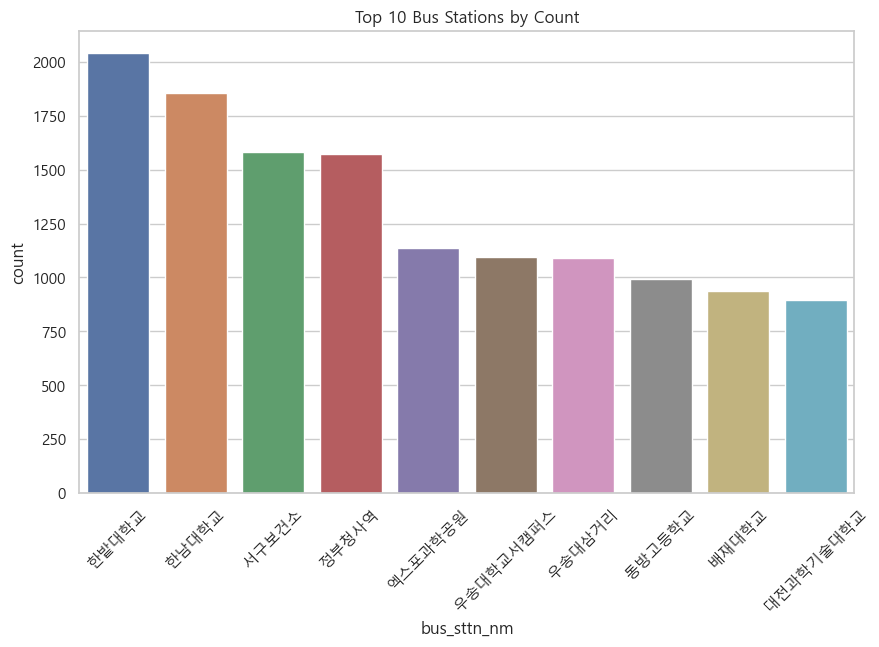

In [310]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 그래프 스타일 설정
# sns.set(style="whitegrid")
# plt.rc('font',family='malgun gothic')
# # 그래프 그리기
# plt.figure(figsize=(10, 6))
# sns.barplot(x='bus_sttn_nm', y='count', data=merge_data)

# # x축 레이블 회전
# plt.xticks(rotation=45)

# # 그래프 제목 설정
# plt.title('Top 10 Bus Stations by Count')

# # 그래프 표시
# plt.show()


환승 0회, 가장 많이 하차한 정류장 10

In [311]:
# top_stations_df = pd.DataFrame(df_transf_0_morning_concat['GETOFF_BUS_STTN_ID'].value_counts().head(10)).reset_index()
# merge_data = top_stations_df.merge(bus_sttn, left_on = 'GETOFF_BUS_STTN_ID', right_on = 'bus_sttn_id')
# merge_data = merge_data[['GETOFF_BUS_STTN_ID','count','bus_sttn_nm']]
# merge_data

,GETOFF_BUS_STTN_ID,count,bus_sttn_nm
0,8002453,13550,은하수네거리
1,8002412,8430,유성온천역7번출구
2,8001097,8262,복합터미널
3,8002814,8146,파랑새네거리
4,8002969,6884,시청역
5,8002279,6349,용문역5번출구
6,8001927,5613,서대전네거리역2번출구
7,8002558,5496,정부청사역
8,8001934,5204,서대전역네거리
9,8001412,5033,대전역/역전시장


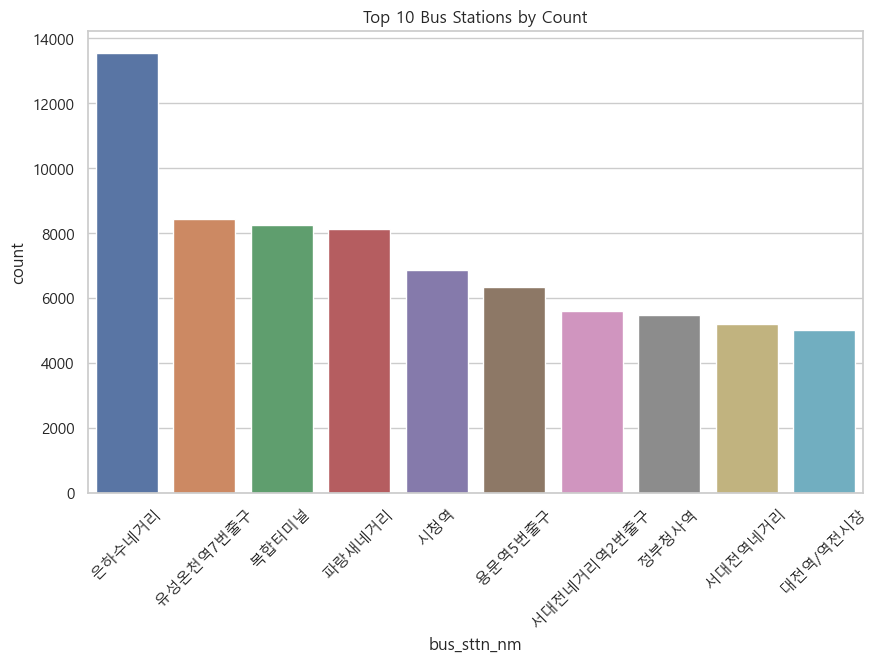

In [312]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 그래프 스타일 설정
# sns.set(style="whitegrid")
# plt.rc('font',family='malgun gothic')
# # 그래프 그리기
# plt.figure(figsize=(10, 6))
# sns.barplot(x='bus_sttn_nm', y='count', data=merge_data)

# # x축 레이블 회전
# plt.xticks(rotation=45)

# # 그래프 제목 설정
# plt.title('Top 10 Bus Stations by Count')

# # 그래프 표시
# plt.show()


환승 1회 가장 많이 승차한 정류장

In [313]:
# top_stations_df = pd.DataFrame(df_transf_1_night_concat['GETON_BUS_STTN_ID_1'].value_counts().head(10)).reset_index()
# merge_data = top_stations_df.merge(bus_sttn, left_on = 'GETON_BUS_STTN_ID_1', right_on = 'bus_sttn_id')
# merge_data = merge_data[['GETON_BUS_STTN_ID_1','count','bus_sttn_nm']]
# merge_data

,GETON_BUS_STTN_ID_1,count,bus_sttn_nm
0,8002920,1968,한밭대학교
1,8001922,1861,서구보건소
2,8002905,1208,한남대학교
3,8003101,1180,목원대네거리
4,8001085,1143,한남로삼거리
5,8002831,1102,배재대학교
6,8070030,899,흥도초등학교
7,8002559,811,정부청사역
8,8001096,764,복합터미널
9,8002305,749,용운마젤란아파트


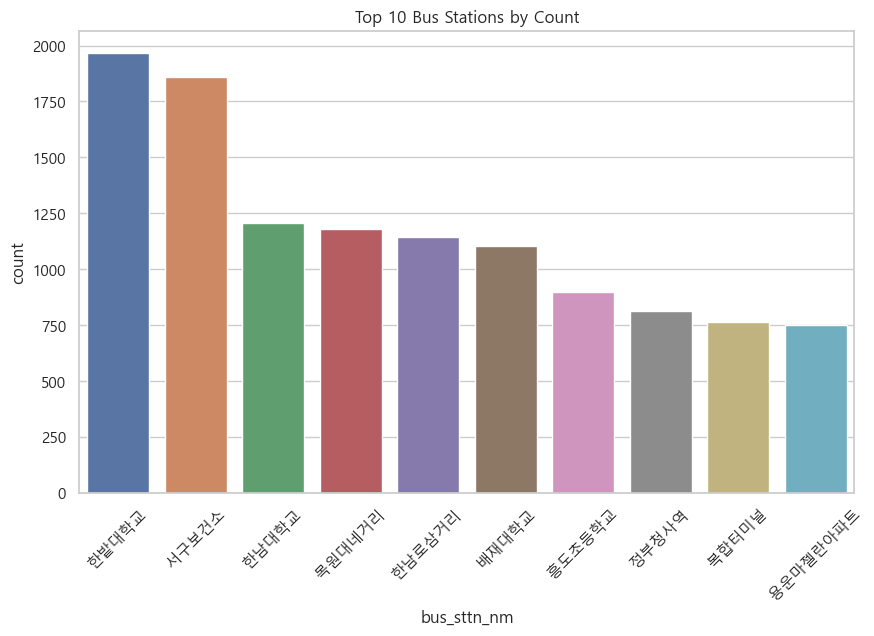

In [314]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 그래프 스타일 설정
# sns.set(style="whitegrid")
# plt.rc('font',family='malgun gothic')
# # 그래프 그리기
# plt.figure(figsize=(10, 6))
# sns.barplot(x='bus_sttn_nm', y='count', data=merge_data)

# # x축 레이블 회전
# plt.xticks(rotation=45)

# # 그래프 제목 설정
# plt.title('Top 10 Bus Stations by Count')

# # 그래프 표시
# plt.show()


환승 0회 가장 많이 승차한 정류장

In [315]:
# top_stations_df = pd.DataFrame(df_transf_0_night_concat['GETON_BUS_STTN_ID'].value_counts().head(10)).reset_index()
# merge_data = top_stations_df.merge(bus_sttn, left_on = 'GETON_BUS_STTN_ID', right_on = 'bus_sttn_id')
# merge_data = merge_data[['GETON_BUS_STTN_ID','count','bus_sttn_nm']]
# merge_data

,GETON_BUS_STTN_ID,count,bus_sttn_nm
0,8002920,9588,한밭대학교
1,8001096,7259,복합터미널
2,8001922,7176,서구보건소
3,8002721,5436,충남대학교
4,8001085,5365,한남로삼거리
5,8001078,4974,갤러리아타임월드
6,8001418,4931,대전역
7,8002339,4789,우송대학교서캠퍼스
8,8002905,4683,한남대학교
9,8070030,4621,흥도초등학교


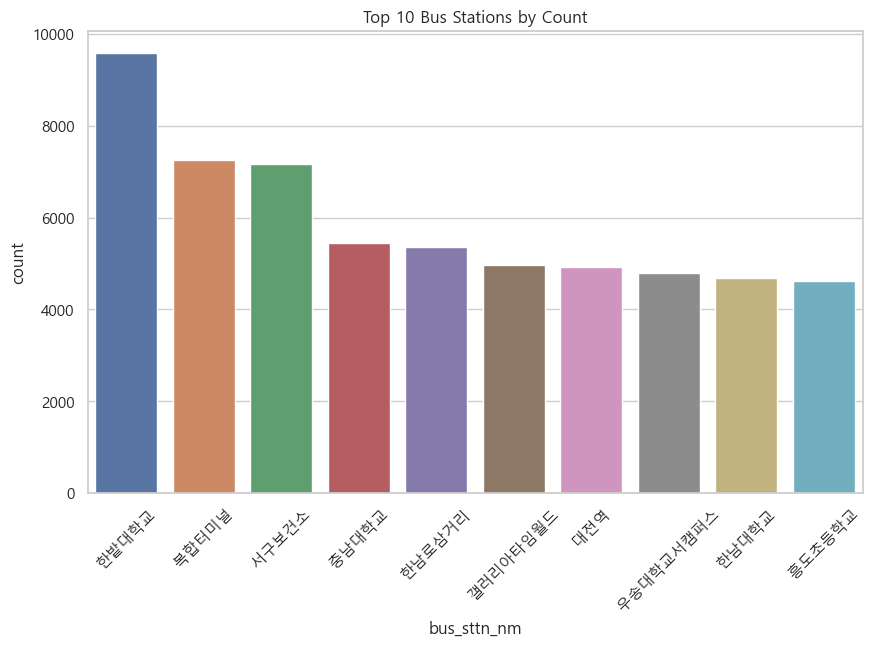

In [316]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 그래프 스타일 설정
# sns.set(style="whitegrid")
# plt.rc('font',family='malgun gothic')
# # 그래프 그리기
# plt.figure(figsize=(10, 6))
# sns.barplot(x='bus_sttn_nm', y='count', data=merge_data)

# # x축 레이블 회전
# plt.xticks(rotation=45)

# # 그래프 제목 설정
# plt.title('Top 10 Bus Stations by Count')

# # 그래프 표시
# plt.show()


## 환승횟수 별 많이 이용한 노선

### 환승횟수 0회

In [1]:
import pandas as pd

df_transf_0_morning_concat = pd.read_csv('./data/df_transf_0_morning_concat.csv')
df_transf_1_morning_concat = pd.read_csv('./data/df_transf_1_morning_concat.csv')
df_transf_0_night_concat = pd.read_csv('./data/df_transf_0_night_concat.csv')
df_transf_1_night_concat = pd.read_csv('./data/df_transf_1_night_concat.csv')

In [11]:
df_transf_1_morning_concat

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,BUS_CO_ID_1,BUS_CAR_ID_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,...,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,90052852,676,606,130010009,130759183,0,8001299,1250,2022-04-01 07:49:12,36.384212,...,8001005,0,2022-04-01 08:20:03,36.357365,127.395950,8005960,0,2022-04-01 08:29:58,36.358627,127.423065
1,741570476,676,105,130010013,130759871,0,8002869,1250,2022-04-01 07:38:28,36.346530,...,8001005,0,2022-04-01 07:49:56,36.357365,127.395950,8005960,0,2022-04-01 07:57:34,36.358627,127.423065
2,676181678,675,617,130010011,130759506,0,8002338,1250,2022-04-01 08:30:53,36.354168,...,8001005,0,2022-04-01 08:37:51,36.357365,127.395950,8005960,0,2022-04-01 08:45:21,36.358627,127.423065
3,755644716,675,918,130010006,130752071,0,8001922,1250,2022-04-01 08:59:59,36.368270,...,8001576,0,2022-04-01 09:17:02,36.359592,127.392580,8005960,0,2022-04-01 09:30:23,36.358627,127.423065
4,779870393,676,604,130010009,130759146,0,8001922,1250,2022-04-01 08:06:30,36.368270,...,8002559,0,2022-04-01 08:14:40,36.357445,127.380660,8005960,0,2022-04-01 08:29:59,36.358627,127.423065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123381,758748182,676,108,130010015,130759632,1,8002378,0,2022-04-29 07:48:47,36.358727,...,8005587,1250,2022-04-29 08:13:17,36.368810,127.345730,8007325,0,2022-04-29 08:21:35,36.358500,127.361000
123382,677182202,676,105,130010013,130759830,0,8001032,1250,2022-04-29 09:13:25,36.356636,...,8002101,0,2022-04-29 09:31:33,36.357490,127.446810,8001942,0,2022-04-29 10:02:39,36.338524,127.385170
123383,592558461,676,108,130010015,130759635,0,8002255,1250,2022-04-29 08:06:04,36.298992,...,8001095,0,2022-04-29 08:14:37,36.296900,127.460045,8001044,0,2022-04-29 08:22:44,36.308857,127.450066
123384,756187396,675,618,130010001,130759471,0,8001411,1250,2022-04-29 09:00:43,36.313187,...,8002443,0,2022-04-29 09:59:29,36.302387,127.459670,8001348,0,2022-04-29 10:16:55,36.329060,127.441734


In [13]:
import pydeck as pdk

layer = pdk.Layer(
    'GPUGridLayer', # 대용량 데이터의 경우 'GPUGridLayer'
    df_transf_1_morning_concat,
    get_position='[GETOFF_BUS_Y_2,GETOFF_BUS_X_2]',
    pickable=True,
    auto_highlight=True
)

view_state = pdk.ViewState(
    longitude=127.3845475,
    latitude=36.3504119,
    zoom=11)

layer.type = 'ScreenGridLayer'
layer.cellSizePixels = 20 # default 100

view_state.bearing = 0
view_state.pitch = 0

r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.show()

DeckGLWidget(carto_key=None, custom_libraries=[], google_maps_key=None, json_input='{\n  "initialViewState": {…

In [38]:
# import geopandas as gpd
# import folium

# DJ = gpd.read_file('./data/TL_SCCO_SIG.json')
# SGG_CD = ['30230','30110','30170','30200','30140']
# DJ_SGG = DJ[DJ['SIG_CD'].isin(SGG_CD)]

# # 중심 좌표 설정
# center_coords = (DJ_SGG['geometry'].centroid.y.mean(), DJ_SGG['geometry'].centroid.x.mean())

# # 지도 생성
# m = folium.Map(location=center_coords, zoom_start=11)

# # GeoDataFrame의 폴리곤을 지도에 추가
# for idx, row in DJ_SGG.iterrows():
#     folium.GeoJson(
#         data=row['geometry'],
#         name=row['SIG_KOR_NM'],
#         style_function=lambda feature: {'fillColor': 'blue', 'color': 'blue'},
#     ).add_to(m)

# # 지도 출력
# # m.save('DJ_SGG_polygon_map.html')

In [41]:
import pydeck as pdk

layer = pdk.Layer(
    'GPUGridLayer', # 대용량 데이터의 경우 'GPUGridLayer'
    df_transf_1_night_concat,
    get_position='[GETON_BUS_Y_1,GETON_BUS_X_1]',
    pickable=True,
    auto_highlight=True
)

view_state = pdk.ViewState(
    longitude=127.3845475,
    latitude=36.3504119,
    zoom=11)

layer.type = 'ScreenGridLayer'
layer.cellSizePixels = 20 # default 100

view_state.bearing = 0
view_state.pitch = 0

r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.show()

DeckGLWidget(carto_key=None, custom_libraries=[], google_maps_key=None, json_input='{\n  "initialViewState": {…